# Assignment No. 5: MIE 1628 Cloud Data Analytics

# SQL Import

## Install dependencies

In [ ]:
# Terminal Window (not here)
# system ODBC headers (for pyodbc)
!sudo apt-get update && sudo apt-get install -y unixodbc-dev


In [1]:
!pip install pyodbc pandas sqlalchemy azure-identity azure-keyvault-secrets

## IP info for Firewall settings

In [6]:
import requests; print(requests.get("https://ifconfig.me").text)

172.191.40.89


Add this IP to the `server-sql-nazib1` -> **Networks** -> **Fire-wall Rules** -> **Add Client IP**

## SQL Start Loading

In [2]:
import pyodbc, pandas as pd

Look at what drivers you have

In [4]:
import pyodbc
pyodbc.drivers()

['ODBC Driver 17 for SQL Server']

In [7]:
server   = "server-sql-nazib1.database.windows.net"
database = "SQL_DB_genderData1"
username = "nazib"
password = "SQLServerMIE1628"  # for testing only; prefer Key Vault below

conn_str = (
    "Driver={ODBC Driver 17 for SQL Server};"
    f"Server=tcp:{server},1433;"
    f"Database={database};"
    f"Uid={username};"
    f"Pwd={password};"
    "Encrypt=yes;TrustServerCertificate=no;Connection Timeout=30;"
)


# Load to Pandas
with pyodbc.connect(conn_str) as conn:
    df = pd.read_sql("SELECT * FROM dbo.HierarchicalTimeSeriesSales;", conn)

df.head()


/tmp/ipykernel_4762/2498293823.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT * FROM dbo.HierarchicalTimeSeriesSales;", conn)


,DATE,QTY_B1_1,QTY_B1_2,QTY_B1_3,QTY_B1_4,QTY_B1_5,QTY_B1_6,QTY_B1_7,QTY_B1_8,QTY_B1_9,...,PROMO_B4_1,PROMO_B4_2,PROMO_B4_3,PROMO_B4_4,PROMO_B4_5,PROMO_B4_6,PROMO_B4_7,PROMO_B4_8,PROMO_B4_9,PROMO_B4_10
0,2014-01-02,7,3,0,2,3,1,0,4,0,...,0,0,0,0,0,0,0,0,0,0
1,2014-01-03,5,0,0,6,9,1,2,4,0,...,0,0,0,0,0,0,0,0,0,0
2,2014-01-04,9,7,2,1,5,2,0,6,4,...,0,0,0,0,0,0,0,0,0,0
3,2014-01-05,5,1,2,2,3,0,1,4,5,...,0,0,0,0,0,0,0,0,0,0
4,2014-01-06,1,0,1,0,1,0,0,2,1,...,0,0,0,0,1,0,1,0,0,1


Successfully Loaded the DataFrame From SQL!!!!!

# Loading Dataset

In [2]:
import pandas as pd

In [3]:
%pwd

'/mnt/batch/tasks/shared/LS_root/mounts/clusters/computeassg5/code/Users/nazib.chowdhury'

In [4]:
%ls

Assg5_Data_Analysis.ipynb*         hierarchical_sales_data.csv*
assg5_data_analysis.ipynb.amltmp*


In [5]:
df = pd.read_csv('hierarchical_sales_data.csv')
df.head()

,DATE,QTY_B1_1,QTY_B1_2,QTY_B1_3,QTY_B1_4,QTY_B1_5,QTY_B1_6,QTY_B1_7,QTY_B1_8,QTY_B1_9,...,PROMO_B4_1,PROMO_B4_2,PROMO_B4_3,PROMO_B4_4,PROMO_B4_5,PROMO_B4_6,PROMO_B4_7,PROMO_B4_8,PROMO_B4_9,PROMO_B4_10
0,2014-01-02,7,3,0,2,3,1,0,4,0,...,0,0,0,0,0,0,0,0,0,0
1,2014-01-03,5,0,0,6,9,1,2,4,0,...,0,0,0,0,0,0,0,0,0,0
2,2014-01-04,9,7,2,1,5,2,0,6,4,...,0,0,0,0,0,0,0,0,0,0
3,2014-01-05,5,1,2,2,3,0,1,4,5,...,0,0,0,0,0,0,0,0,0,0
4,2014-01-06,1,0,1,0,1,0,0,2,1,...,0,0,0,0,1,0,1,0,0,1


In [6]:
df

,DATE,QTY_B1_1,QTY_B1_2,QTY_B1_3,QTY_B1_4,QTY_B1_5,QTY_B1_6,QTY_B1_7,QTY_B1_8,QTY_B1_9,...,PROMO_B4_1,PROMO_B4_2,PROMO_B4_3,PROMO_B4_4,PROMO_B4_5,PROMO_B4_6,PROMO_B4_7,PROMO_B4_8,PROMO_B4_9,PROMO_B4_10
0,2014-01-02,7,3,0,2,3,1,0,4,0,...,0,0,0,0,0,0,0,0,0,0
1,2014-01-03,5,0,0,6,9,1,2,4,0,...,0,0,0,0,0,0,0,0,0,0
2,2014-01-04,9,7,2,1,5,2,0,6,4,...,0,0,0,0,0,0,0,0,0,0
3,2014-01-05,5,1,2,2,3,0,1,4,5,...,0,0,0,0,0,0,0,0,0,0
4,2014-01-06,1,0,1,0,1,0,0,2,1,...,0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1793,2018-12-27,4,6,4,3,1,0,4,0,7,...,0,0,1,0,1,0,0,1,1,1
1794,2018-12-28,0,0,10,2,0,0,4,3,18,...,0,1,1,0,1,1,1,1,1,1
1795,2018-12-29,0,0,3,3,1,1,1,1,8,...,0,1,1,1,1,1,1,1,1,1
1796,2018-12-30,0,2,4,2,5,3,9,3,0,...,1,0,1,1,1,1,1,0,0,1


In [7]:
df.describe()

,QTY_B1_1,QTY_B1_2,QTY_B1_3,QTY_B1_4,QTY_B1_5,QTY_B1_6,QTY_B1_7,QTY_B1_8,QTY_B1_9,QTY_B1_10,...,PROMO_B4_1,PROMO_B4_2,PROMO_B4_3,PROMO_B4_4,PROMO_B4_5,PROMO_B4_6,PROMO_B4_7,PROMO_B4_8,PROMO_B4_9,PROMO_B4_10
count,1798.000000,1798.000000,1798.000000,1798.000000,1798.000000,1798.000000,1798.000000,1798.000000,1798.000000,1798.000000,...,1798.000000,1798.000000,1798.000000,1798.000000,1798.000000,1798.000000,1798.000000,1798.000000,1798.000000,1798.000000
mean,5.895439,2.838154,2.994438,2.032814,2.694105,1.242492,2.567297,2.244160,5.066741,2.748610,...,0.204116,0.174082,0.193548,0.169633,0.208009,0.184650,0.181869,0.201891,0.186874,0.216908
std,11.908115,3.844205,2.651103,1.733667,6.175587,1.539369,2.668616,2.211395,6.546864,8.116993,...,0.403166,0.379286,0.395189,0.375414,0.405996,0.388121,0.385844,0.401523,0.389919,0.412254
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.000000,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,3.000000,6.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,166.000000,41.000000,24.000000,12.000000,68.000000,12.000000,32.000000,17.000000,71.000000,246.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1798 entries, 0 to 1797
Columns: 237 entries, DATE to PROMO_B4_10
dtypes: int64(236), object(1)
memory usage: 3.3+ MB


In [9]:
df.columns.to_list()

['DATE',
 'QTY_B1_1',
 'QTY_B1_2',
 'QTY_B1_3',
 'QTY_B1_4',
 'QTY_B1_5',
 'QTY_B1_6',
 'QTY_B1_7',
 'QTY_B1_8',
 'QTY_B1_9',
 'QTY_B1_10',
 'QTY_B1_11',
 'QTY_B1_12',
 'QTY_B1_13',
 'QTY_B1_14',
 'QTY_B1_15',
 'QTY_B1_16',
 'QTY_B1_17',
 'QTY_B1_18',
 'QTY_B1_19',
 'QTY_B1_20',
 'QTY_B1_21',
 'QTY_B1_22',
 'QTY_B1_23',
 'QTY_B1_24',
 'QTY_B1_25',
 'QTY_B1_26',
 'QTY_B1_27',
 'QTY_B1_28',
 'QTY_B1_29',
 'QTY_B1_30',
 'QTY_B1_31',
 'QTY_B1_32',
 'QTY_B1_33',
 'QTY_B1_34',
 'QTY_B1_35',
 'QTY_B1_36',
 'QTY_B1_37',
 'QTY_B1_38',
 'QTY_B1_39',
 'QTY_B1_40',
 'QTY_B1_41',
 'QTY_B1_42',
 'QTY_B2_1',
 'QTY_B2_2',
 'QTY_B2_3',
 'QTY_B2_4',
 'QTY_B2_5',
 'QTY_B2_6',
 'QTY_B2_7',
 'QTY_B2_8',
 'QTY_B2_9',
 'QTY_B2_10',
 'QTY_B2_11',
 'QTY_B2_12',
 'QTY_B2_13',
 'QTY_B2_14',
 'QTY_B2_15',
 'QTY_B2_16',
 'QTY_B2_17',
 'QTY_B2_18',
 'QTY_B2_19',
 'QTY_B2_20',
 'QTY_B2_21',
 'QTY_B2_22',
 'QTY_B2_23',
 'QTY_B2_24',
 'QTY_B2_25',
 'QTY_B2_26',
 'QTY_B2_27',
 'QTY_B2_28',
 'QTY_B2_29',
 'QTY_B2_30',
 

# Data Cleaning & Pre-process

## DateTime Conversion

In [10]:
#type of data in Date column
df['DATE'].dtype

dtype('O')

In [11]:
type(df['DATE'][1])

str

Confirms that date is in str datatype. Need to change it to date-time

In [12]:
#convert 'Date' to datetime
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y-%m-%d')
df['DATE'].dtype

dtype('<M8[ns]')

In [13]:
type(df['DATE'][1])

pandas._libs.tslibs.timestamps.Timestamp

Confirms that has been converted to timestamp format for datetime

## Cleaning Missing Values

There might be some missing values, some missing dates. We need to fill this up with zero

In [14]:
# Check for Missing Dates

# List all dates
dates_list = df['DATE'].tolist()

# Check for missing dates
missing_dates = [date for date in pd.date_range(start=df['DATE'].min(), end=df['DATE'].max(), freq='D') if date not in dates_list]

missing_dates

[Timestamp('2014-04-20 00:00:00'),
 Timestamp('2014-05-01 00:00:00'),
 Timestamp('2014-08-15 00:00:00'),
 Timestamp('2014-12-25 00:00:00'),
 Timestamp('2015-01-01 00:00:00'),
 Timestamp('2015-04-05 00:00:00'),
 Timestamp('2015-05-01 00:00:00'),
 Timestamp('2015-08-15 00:00:00'),
 Timestamp('2015-12-25 00:00:00'),
 Timestamp('2016-01-01 00:00:00'),
 Timestamp('2016-03-27 00:00:00'),
 Timestamp('2016-05-01 00:00:00'),
 Timestamp('2016-08-15 00:00:00'),
 Timestamp('2016-12-25 00:00:00'),
 Timestamp('2017-01-01 00:00:00'),
 Timestamp('2017-04-16 00:00:00'),
 Timestamp('2017-12-25 00:00:00'),
 Timestamp('2018-01-01 00:00:00'),
 Timestamp('2018-04-01 00:00:00'),
 Timestamp('2018-04-25 00:00:00'),
 Timestamp('2018-05-01 00:00:00'),
 Timestamp('2018-06-02 00:00:00'),
 Timestamp('2018-08-15 00:00:00'),
 Timestamp('2018-11-01 00:00:00'),
 Timestamp('2018-12-08 00:00:00'),
 Timestamp('2018-12-25 00:00:00'),
 Timestamp('2018-12-26 00:00:00')]

Looks like there are quite some few missing values. We need to fill it up with 0.0 in all columns to indicate 0 sales

In [15]:
# Set index as the date

df.set_index('DATE', inplace=True)

In [16]:
try:
    df.loc['2014-04-20']
except:
    print("That date was missing")

That date was missing


In [17]:
missing_dates[1]

Timestamp('2014-05-01 00:00:00')

In [18]:
# format date-missing_dates
missing_dates = [date.strftime('%Y-%m-%d') for date in missing_dates]

missing_dates[:5]

['2014-04-20', '2014-05-01', '2014-08-15', '2014-12-25', '2015-01-01']

In [19]:
type(missing_dates[1])

str

In [20]:
for date in missing_dates:
    try:
        df.loc[date]
    except:
        print(f"That date was missing: {date}")

That date was missing: 2014-04-20
That date was missing: 2014-05-01
That date was missing: 2014-08-15
That date was missing: 2014-12-25
That date was missing: 2015-01-01
That date was missing: 2015-04-05
That date was missing: 2015-05-01
That date was missing: 2015-08-15
That date was missing: 2015-12-25
That date was missing: 2016-01-01
That date was missing: 2016-03-27
That date was missing: 2016-05-01
That date was missing: 2016-08-15
That date was missing: 2016-12-25
That date was missing: 2017-01-01
That date was missing: 2017-04-16
That date was missing: 2017-12-25
That date was missing: 2018-01-01
That date was missing: 2018-04-01
That date was missing: 2018-04-25
That date was missing: 2018-05-01
That date was missing: 2018-06-02
That date was missing: 2018-08-15
That date was missing: 2018-11-01
That date was missing: 2018-12-08
That date was missing: 2018-12-25
That date was missing: 2018-12-26


In [21]:
# Non-missing date
df.loc['2014-01-05']

QTY_B1_1       5
QTY_B1_2       1
QTY_B1_3       2
QTY_B1_4       2
QTY_B1_5       3
              ..
PROMO_B4_6     0
PROMO_B4_7     0
PROMO_B4_8     0
PROMO_B4_9     0
PROMO_B4_10    0
Name: 2014-01-05 00:00:00, Length: 236, dtype: int64

In [22]:
# Fixing Missing Dates

# Appending the missing dates to bottom of dataframe and filling all values with 0.0
for date in missing_dates:
    df.loc[date] = [0.0] * (df.shape[1])

# Convert index to date-time again and sort
df.index = pd.to_datetime(df.index)
df = df.sort_index()

# Trying the missing dates now
no_of_missing_dates = 0
for date in missing_dates:
    try:
        df.loc[date]
        #print(f"That date is now present: {date}")
    except:
        print(f"That date was missing: {date}")
        no_of_missing_dates += 1

        
if no_of_missing_dates == 0:
    print("All missing dates are now present.")

All missing dates are now present.


In [23]:
# check for missing dates again
# Check for missing dates
missing_dates = [date for date in pd.date_range(start=df.index.min(), end=df.index.max(), freq='D') if date not in df.index]

missing_dates

if len(missing_dates) == 0:
    print("All dates from 2014-01-02 to 2018-12-31 are present")

All dates from 2014-01-02 to 2018-12-31 are present


In [24]:
# Finally our filled df

df

,QTY_B1_1,QTY_B1_2,QTY_B1_3,QTY_B1_4,QTY_B1_5,QTY_B1_6,QTY_B1_7,QTY_B1_8,QTY_B1_9,QTY_B1_10,...,PROMO_B4_1,PROMO_B4_2,PROMO_B4_3,PROMO_B4_4,PROMO_B4_5,PROMO_B4_6,PROMO_B4_7,PROMO_B4_8,PROMO_B4_9,PROMO_B4_10
DATE,,,,,,,,,,,,,,,,,,,,,
2014-01-02,7.0,3.0,0.0,2.0,3.0,1.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-01-03,5.0,0.0,0.0,6.0,9.0,1.0,2.0,4.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-01-04,9.0,7.0,2.0,1.0,5.0,2.0,0.0,6.0,4.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-01-05,5.0,1.0,2.0,2.0,3.0,0.0,1.0,4.0,5.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-01-06,1.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27,4.0,6.0,4.0,3.0,1.0,0.0,4.0,0.0,7.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
2018-12-28,0.0,0.0,10.0,2.0,0.0,0.0,4.0,3.0,18.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
2018-12-29,0.0,0.0,3.0,3.0,1.0,1.0,1.0,1.0,8.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


Finally we have 1825 days = 5 * 365 days, makes sense, no more missing days

## Parsing: Seperating Brand and Item 

We will seperate brand name and item and put them in a dictionary

In [25]:
def parse_col(c):
    # c = "QTY_Bx_y" or "PROMO_Bx_Y"
    # we will segregate the x and y using this function
    parts = c.split('_')
    brand = parts[1]  # e.g., "B1"
    item = parts[2]   # e.g., "1"
    return brand, item

In [26]:
# Identify quantity columns and parse Brand / Item
qty_cols = [c for c in df.columns if c.startswith("QTY_")]

# create a dictionary that maps brand to all its items
brand_dict = {}

for c in qty_cols:
    brand, item = parse_col(c)
    if brand not in brand_dict:
        brand_dict[brand] = []  # empty list for each item of the brand
    if item not in brand_dict[brand]:
        brand_dict[brand].append(item)

In [27]:
brand_dict

{'B1': ['1',
  '2',
  '3',
  '4',
  '5',
  '6',
  '7',
  '8',
  '9',
  '10',
  '11',
  '12',
  '13',
  '14',
  '15',
  '16',
  '17',
  '18',
  '19',
  '20',
  '21',
  '22',
  '23',
  '24',
  '25',
  '26',
  '27',
  '28',
  '29',
  '30',
  '31',
  '32',
  '33',
  '34',
  '35',
  '36',
  '37',
  '38',
  '39',
  '40',
  '41',
  '42'],
 'B2': ['1',
  '2',
  '3',
  '4',
  '5',
  '6',
  '7',
  '8',
  '9',
  '10',
  '11',
  '12',
  '13',
  '14',
  '15',
  '16',
  '17',
  '18',
  '19',
  '20',
  '21',
  '22',
  '23',
  '24',
  '25',
  '26',
  '27',
  '28',
  '29',
  '30',
  '31',
  '32',
  '33',
  '34',
  '35',
  '36',
  '37',
  '38',
  '39',
  '40',
  '41',
  '42',
  '43',
  '44',
  '45'],
 'B3': ['1',
  '2',
  '3',
  '4',
  '5',
  '6',
  '7',
  '8',
  '9',
  '10',
  '11',
  '12',
  '13',
  '14',
  '15',
  '16',
  '17',
  '18',
  '19',
  '20',
  '21'],
 'B4': ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']}

In [28]:
# Number of items in each brand
brand_item_counts = {brand: len(items) for brand, items in brand_dict.items()}
print(brand_item_counts)

{'B1': 42, 'B2': 45, 'B3': 21, 'B4': 10}


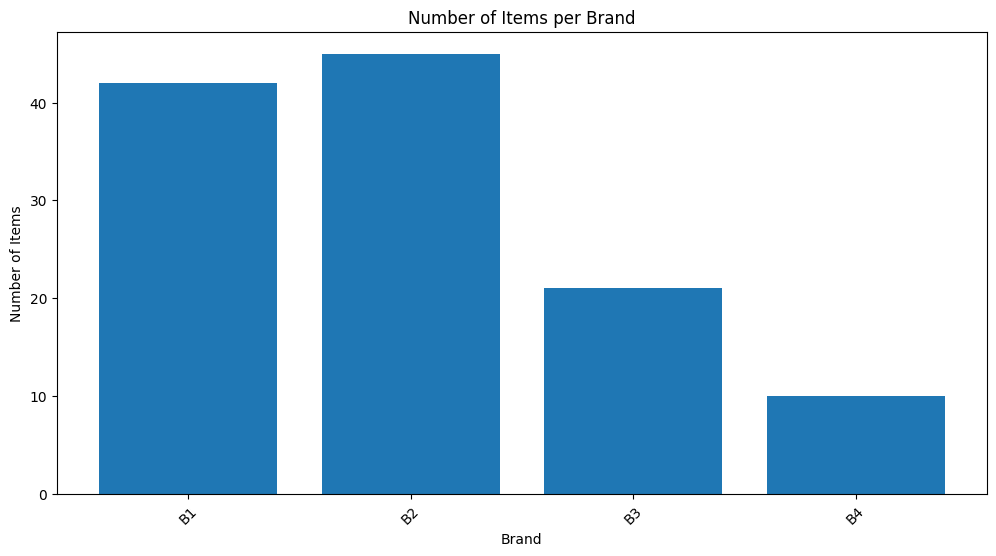

In [29]:
# Histogram of Brand and Items
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(brand_item_counts.keys(), brand_item_counts.values())
plt.xlabel('Brand')
plt.ylabel('Number of Items')
plt.title('Number of Items per Brand')
plt.xticks(rotation=45)
plt.show()

## Augmenting Data: Columns for Brand Total and Store Total Sales

We will create new columns for each "Brand Totat" and "Store Total" sales and store to the dataframe

In [30]:
import pandas as pd

# Detect all brands from QTY_* columns (e.g., QTY_B1_1 -> brand "B1")
qty_cols = [c for c in df.columns if c.startswith("QTY_")]
brands = sorted({c.split("_")[1] for c in qty_cols})

# Create Brand_QTY_<brand> columns
for brand in brands:
    brand_item_cols = [c for c in qty_cols if c.startswith(f"QTY_{brand}_")]
    df[f"Brand_QTY_{brand}"] = df[brand_item_cols].sum(axis=1)

# Create total store-level sales column
df["Total_QTY_Store"] = df[[f"Brand_QTY_{b}" for b in brands]].sum(axis=1)


In [31]:
df.columns.to_list()

['QTY_B1_1',
 'QTY_B1_2',
 'QTY_B1_3',
 'QTY_B1_4',
 'QTY_B1_5',
 'QTY_B1_6',
 'QTY_B1_7',
 'QTY_B1_8',
 'QTY_B1_9',
 'QTY_B1_10',
 'QTY_B1_11',
 'QTY_B1_12',
 'QTY_B1_13',
 'QTY_B1_14',
 'QTY_B1_15',
 'QTY_B1_16',
 'QTY_B1_17',
 'QTY_B1_18',
 'QTY_B1_19',
 'QTY_B1_20',
 'QTY_B1_21',
 'QTY_B1_22',
 'QTY_B1_23',
 'QTY_B1_24',
 'QTY_B1_25',
 'QTY_B1_26',
 'QTY_B1_27',
 'QTY_B1_28',
 'QTY_B1_29',
 'QTY_B1_30',
 'QTY_B1_31',
 'QTY_B1_32',
 'QTY_B1_33',
 'QTY_B1_34',
 'QTY_B1_35',
 'QTY_B1_36',
 'QTY_B1_37',
 'QTY_B1_38',
 'QTY_B1_39',
 'QTY_B1_40',
 'QTY_B1_41',
 'QTY_B1_42',
 'QTY_B2_1',
 'QTY_B2_2',
 'QTY_B2_3',
 'QTY_B2_4',
 'QTY_B2_5',
 'QTY_B2_6',
 'QTY_B2_7',
 'QTY_B2_8',
 'QTY_B2_9',
 'QTY_B2_10',
 'QTY_B2_11',
 'QTY_B2_12',
 'QTY_B2_13',
 'QTY_B2_14',
 'QTY_B2_15',
 'QTY_B2_16',
 'QTY_B2_17',
 'QTY_B2_18',
 'QTY_B2_19',
 'QTY_B2_20',
 'QTY_B2_21',
 'QTY_B2_22',
 'QTY_B2_23',
 'QTY_B2_24',
 'QTY_B2_25',
 'QTY_B2_26',
 'QTY_B2_27',
 'QTY_B2_28',
 'QTY_B2_29',
 'QTY_B2_30',
 'QTY_B2_3

# Exploratory Data Analysis (EDA)

Let's plot some charts to visualize the data

## Daily Sales Charts

Let's plot some daily sales charts of some items and brands to see how the time series data plots against time

In [32]:
# Plot QTY_B1_1 with custom ticks for months (minor) and years (major)
def plot_sales(series_name: str, color: str = 'blue'):
    
    import matplotlib.dates as mdates
    import matplotlib.pyplot as plt

    fig, ax = plt.subplots(figsize=(20,8))
    ax.plot(df.index, df[series_name], label=series_name, color=color)

    # Set major ticks to yearly, minor ticks to monthly
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.xaxis.set_minor_locator(mdates.MonthLocator())
    ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))

    # Improve formatting
    ax.tick_params(axis='x', which='major', labelsize=12, pad=10, rotation=90)
    ax.tick_params(axis='x', which='minor', labelsize=8, rotation=90)

    ax.set_title('Daily Sales for ' + series_name, fontsize=14)
    ax.set_xlabel('Date')
    ax.set_ylabel('Units Sold')
    ax.grid(True)
    ax.legend()
    plt.show()

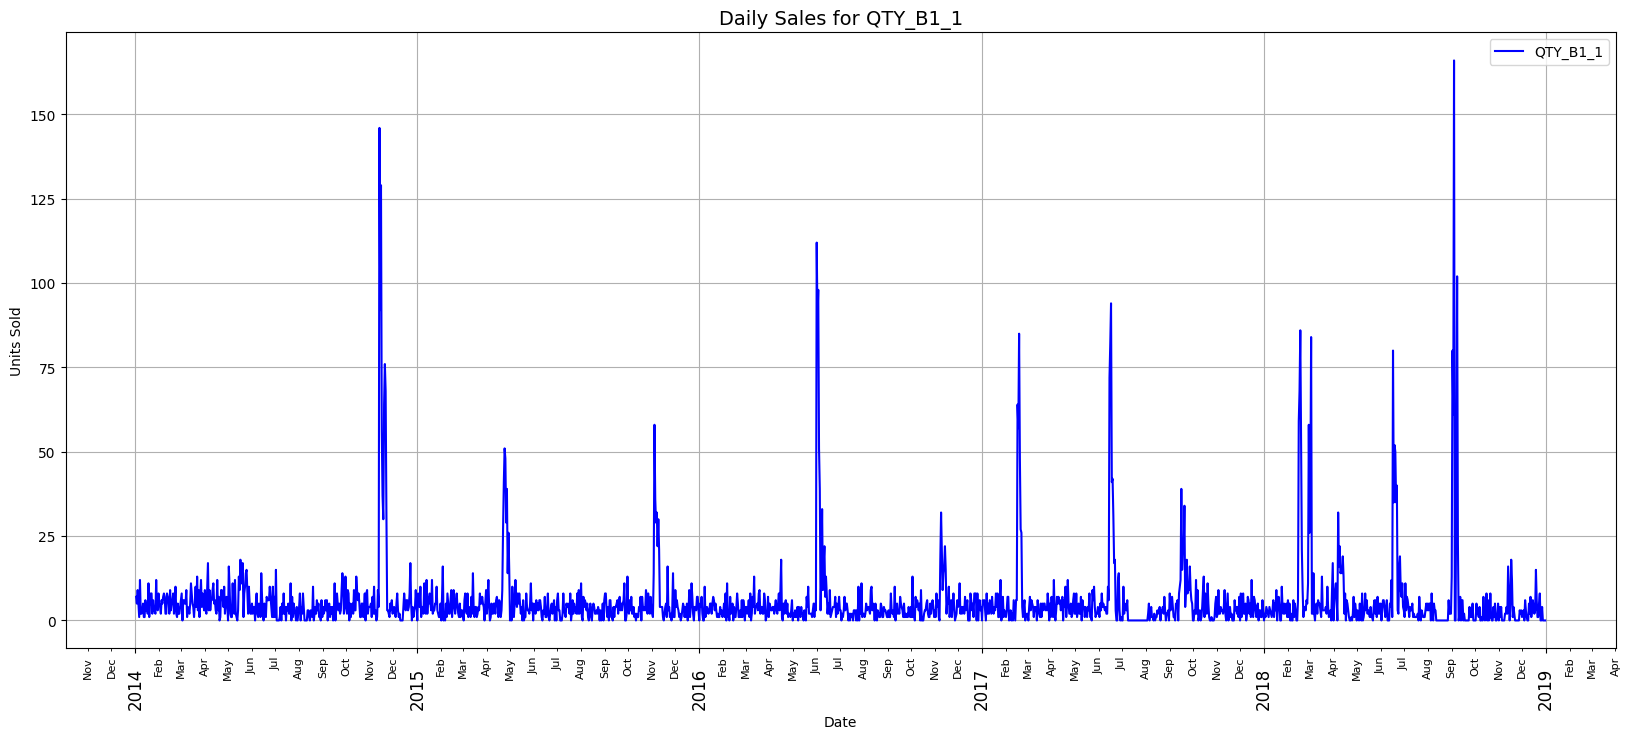

In [33]:
plot_sales('QTY_B1_1')

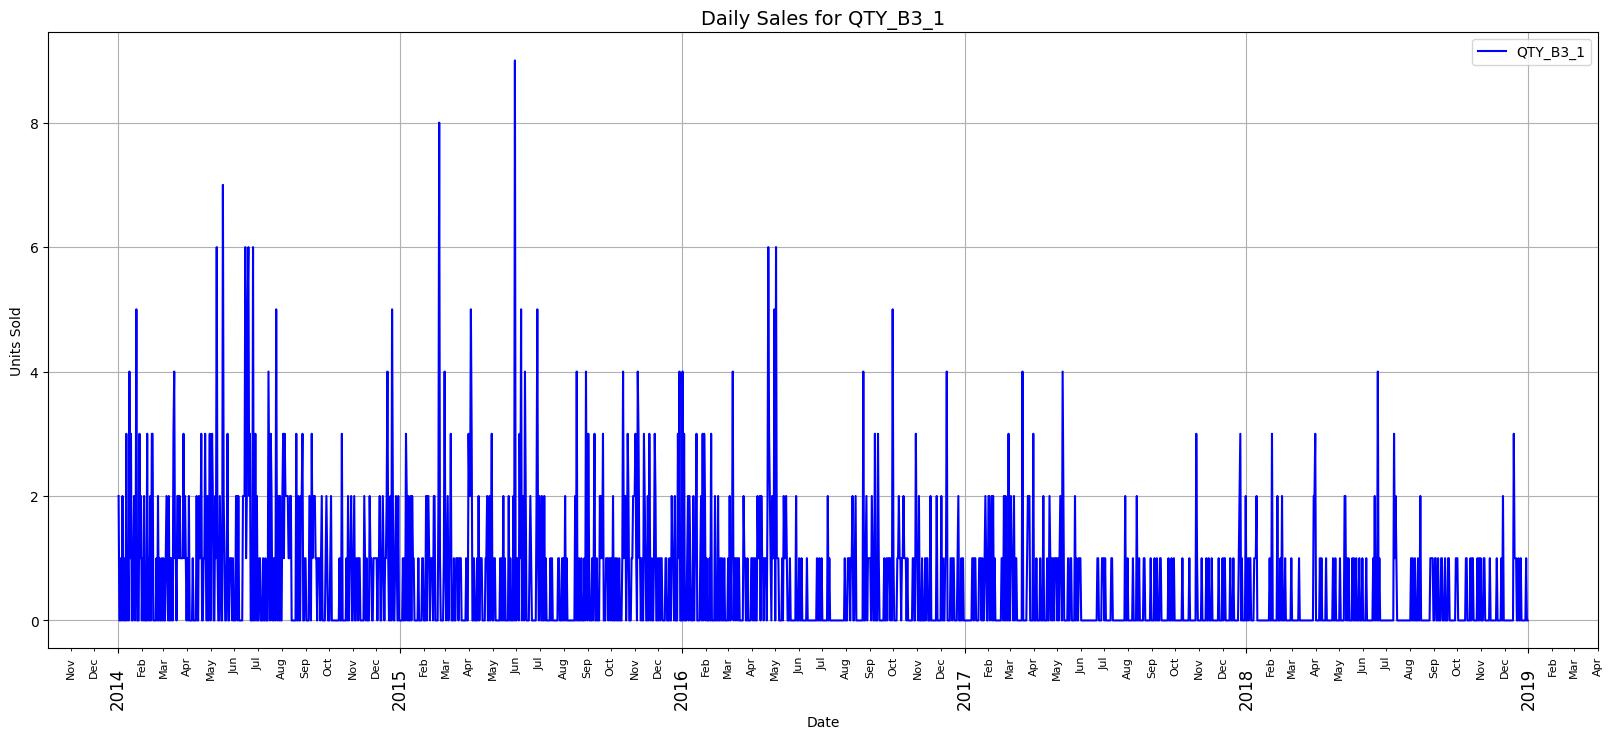

In [34]:
plot_sales('QTY_B3_1')

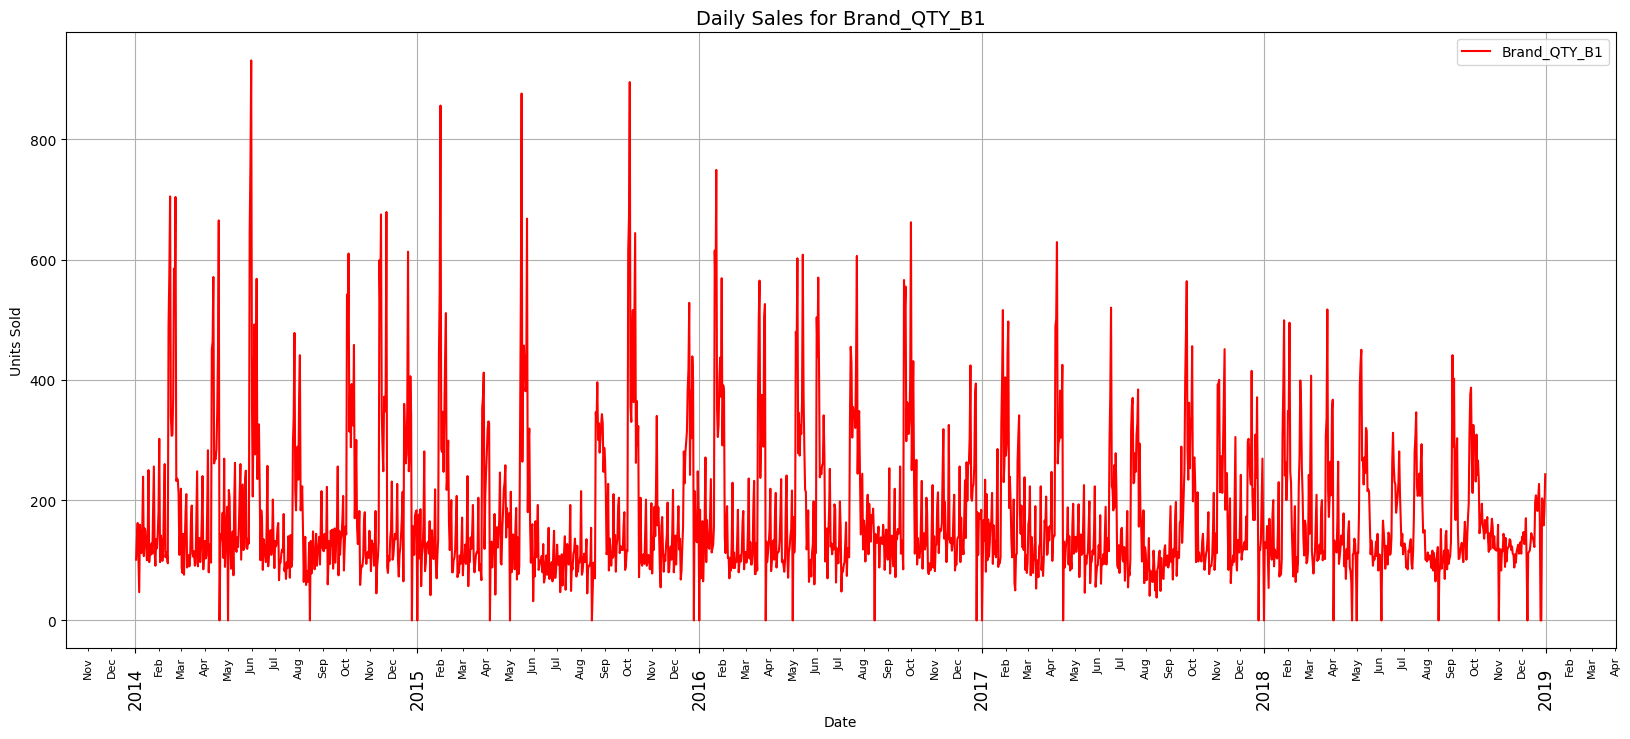

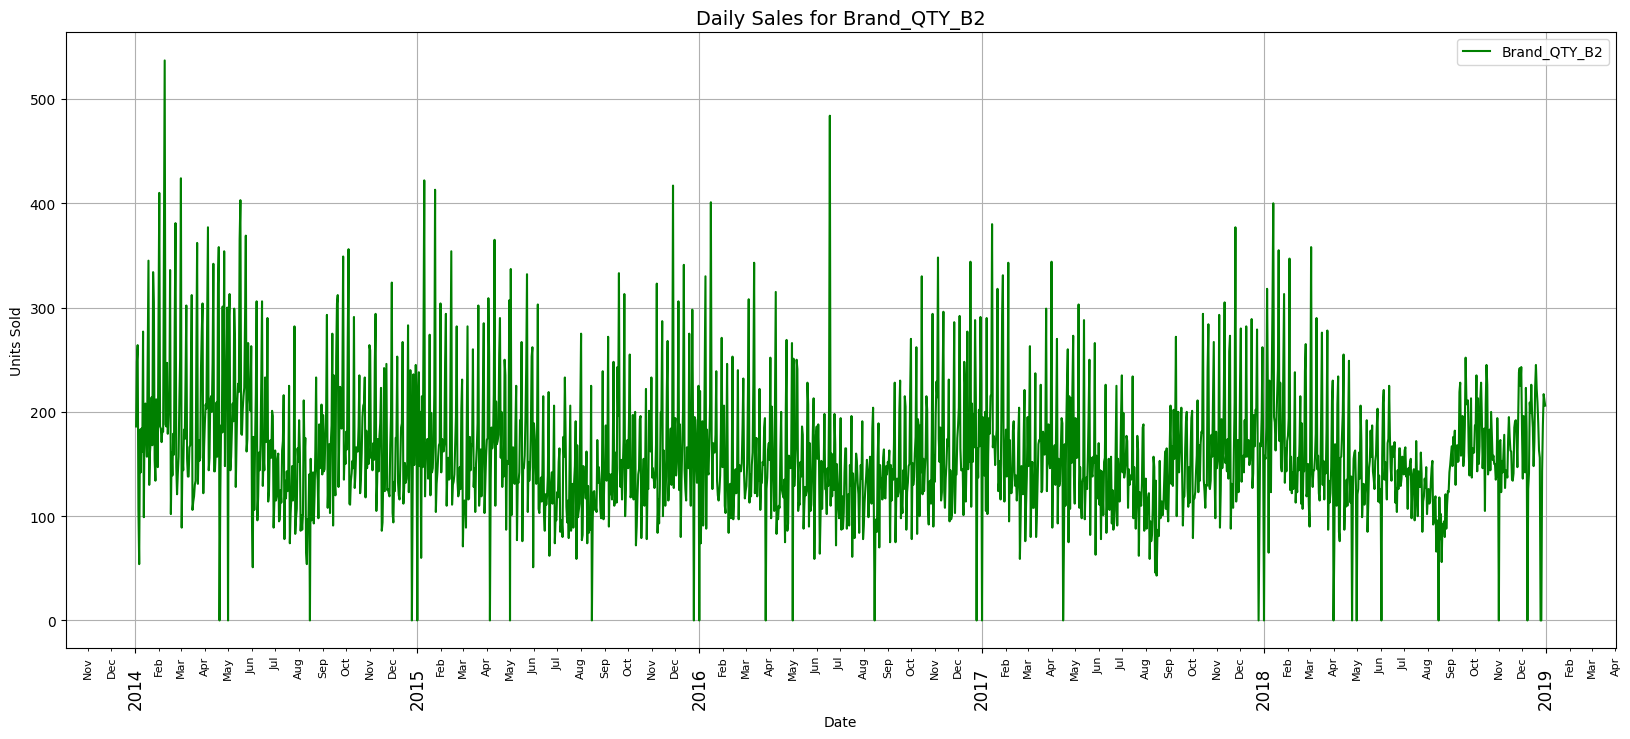

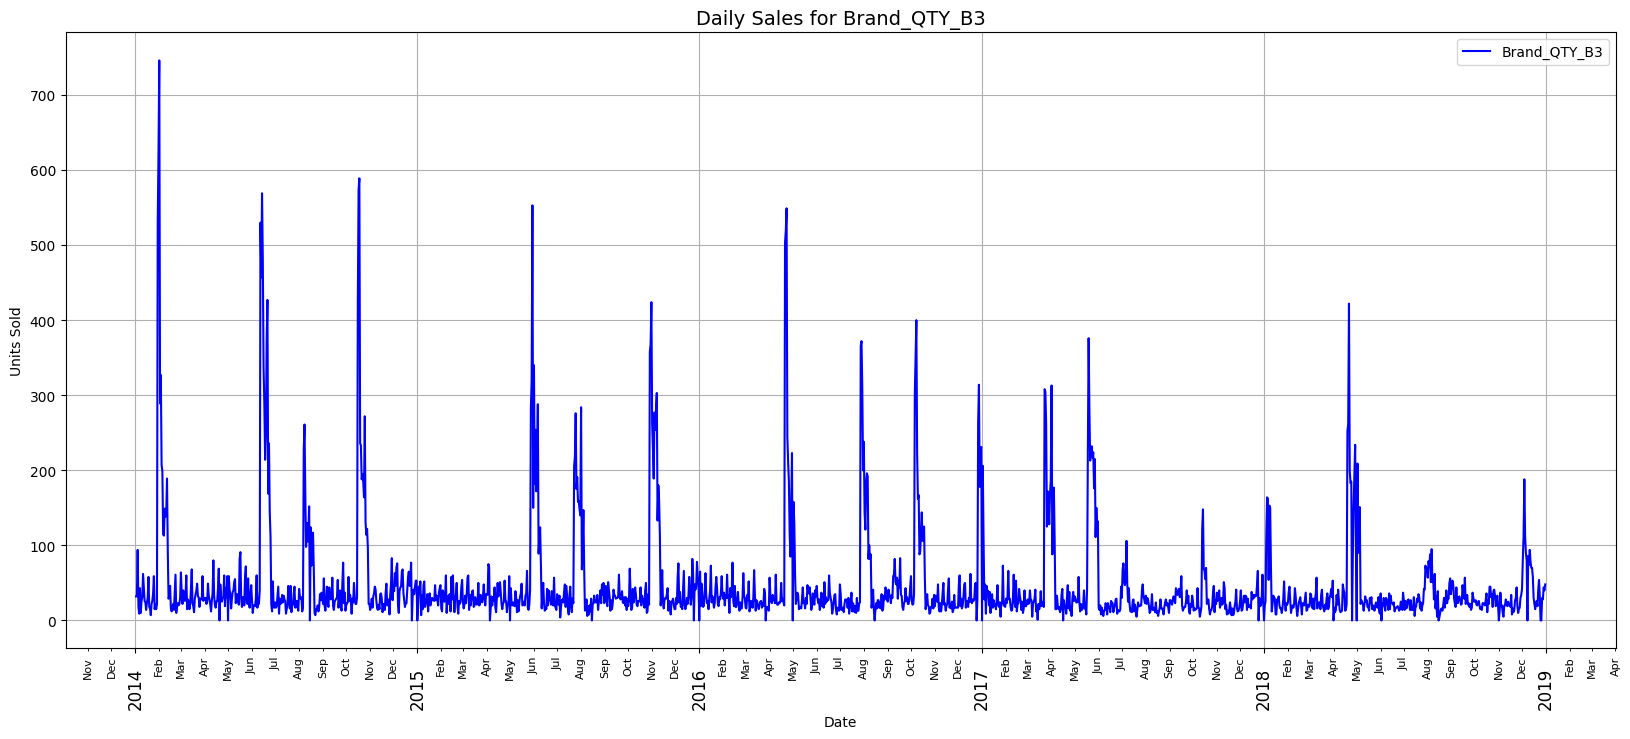

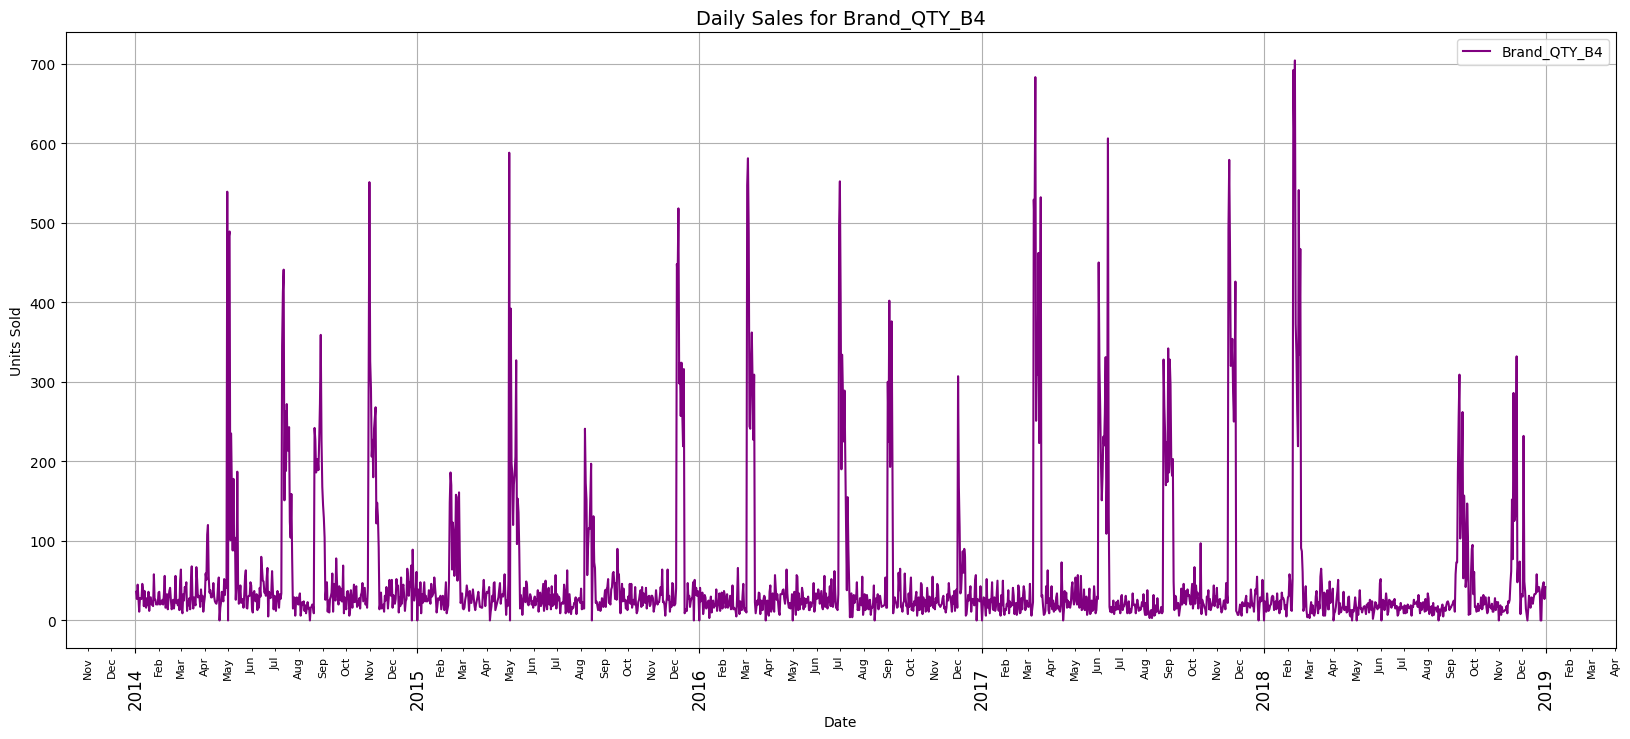

In [35]:
plot_sales('Brand_QTY_B1', color='red')
plot_sales('Brand_QTY_B2', color='green')
plot_sales('Brand_QTY_B3', color='blue')
plot_sales('Brand_QTY_B4', color='purple')

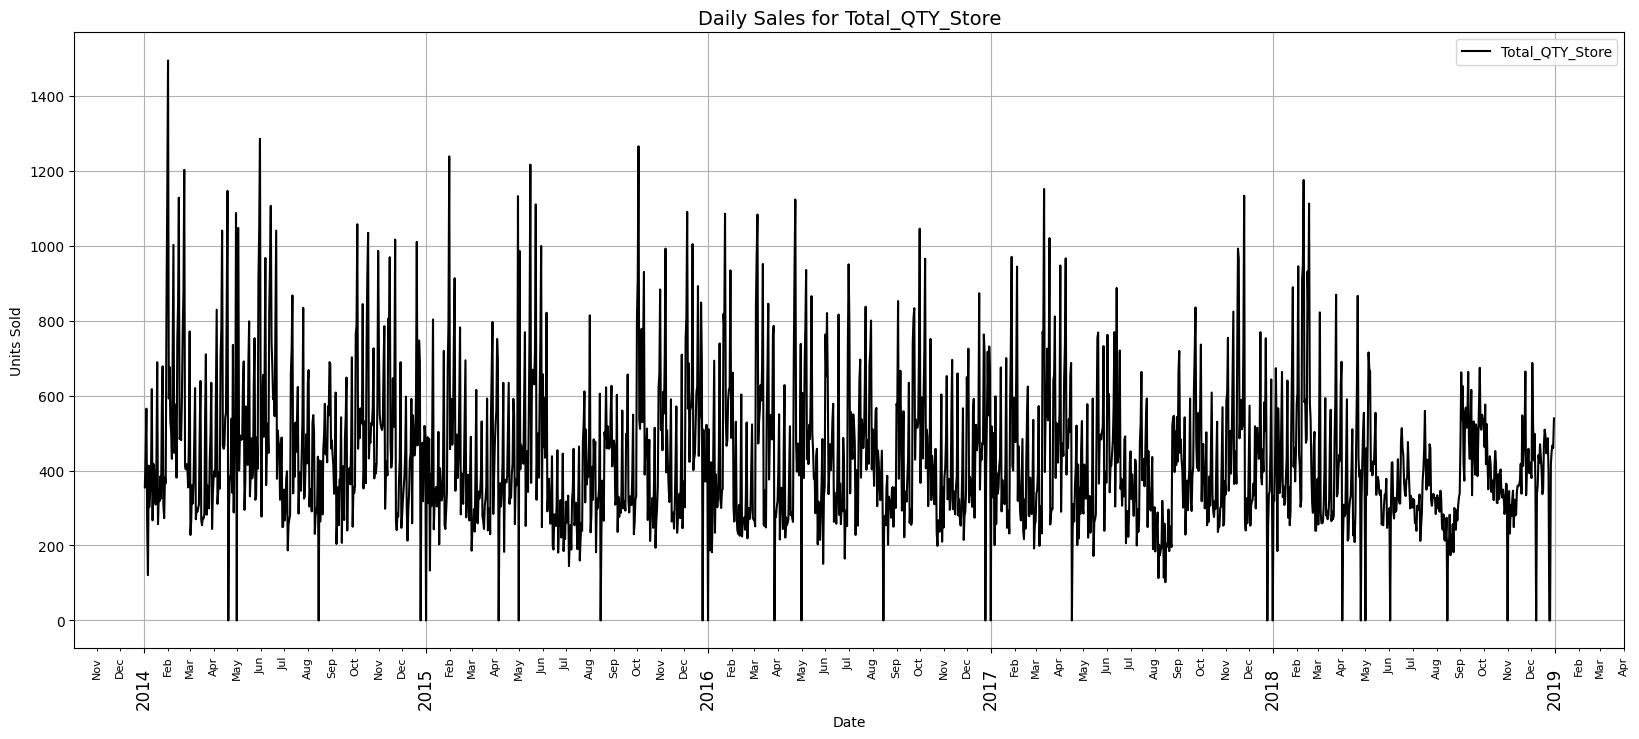

In [36]:
# Total sales of store
plot_sales('Total_QTY_Store', color='black')

Hence the missing values are filled as the graph touches zero now indicating the days when store was closed or no data collected

## Sales in a specific Time-frame

To find sales value within a given time-frame specified by start date and end date

In [37]:
import numpy as np
from typing import Tuple, Union

def sum_column_between_dates(
    df: pd.DataFrame,
    column_name: str,
    start_date: Union[str, pd.Timestamp],
    end_date: Union[str, pd.Timestamp],
) -> Tuple[float, pd.Timestamp, pd.Timestamp]:
    """
    Sum `column_name` between the rows whose `date_col` are closest to `start_date` and `end_date`.

    Parameters
    ----------
    df : DataFrame
        Data containing a datetime column.
    column_name : str
        Column to sum (e.g., "QTY_B1_1").
    start_date : str | pd.Timestamp
        Desired start date (will snap to the closest available date in df[date_col]).
    end_date : str | pd.Timestamp
        Desired end date (will snap to the closest available date in df[date_col]).
    date_col : str
        Name of the datetime column (default "DATE").

    Returns
    -------
    total : float
        Sum of the column over the snapped date range (inclusive).
    snapped_start : pd.Timestamp
        The actual start date used (closest match found in the data).
    snapped_end : pd.Timestamp
        The actual end date used (closest match found in the data).
    """

    dates = df.index  # Index is in date-time format
    
    #---------Date Time conversion if needed---------------------------------

    # Convert inputs to Timestamp
    start_ts = pd.to_datetime(start_date)
    end_ts = pd.to_datetime(end_date)
    if pd.isna(start_ts) or pd.isna(end_ts):  # check if the date-time conversion failed
        raise ValueError("start_date and end_date must be valid datetimes.")

    #----------Snapping to closest Start date and end date--------------------

    # Find closest indices by minimizing absolute time difference
    idx_start = np.argmin(np.abs(dates - start_ts))
    idx_end = np.argmin(np.abs(dates - end_ts))

    # Order correctly
    if idx_start > idx_end:
        idx_start, idx_end = idx_end, idx_start

    snapped_start = dates[idx_start]
    snapped_end = dates[idx_end]

    total = df.loc[snapped_start:snapped_end, column_name].sum()
    return float(total), snapped_start, snapped_end

In [38]:
sum_column_between_dates(df, 'QTY_B1_1', '2014-01-01', '2014-01-15')

(62.0, Timestamp('2014-01-02 00:00:00'), Timestamp('2014-01-15 00:00:00'))

Remember, we created the `brand_dict` to map each brand to all its available items

In [39]:
brand_dict

{'B1': ['1',
  '2',
  '3',
  '4',
  '5',
  '6',
  '7',
  '8',
  '9',
  '10',
  '11',
  '12',
  '13',
  '14',
  '15',
  '16',
  '17',
  '18',
  '19',
  '20',
  '21',
  '22',
  '23',
  '24',
  '25',
  '26',
  '27',
  '28',
  '29',
  '30',
  '31',
  '32',
  '33',
  '34',
  '35',
  '36',
  '37',
  '38',
  '39',
  '40',
  '41',
  '42'],
 'B2': ['1',
  '2',
  '3',
  '4',
  '5',
  '6',
  '7',
  '8',
  '9',
  '10',
  '11',
  '12',
  '13',
  '14',
  '15',
  '16',
  '17',
  '18',
  '19',
  '20',
  '21',
  '22',
  '23',
  '24',
  '25',
  '26',
  '27',
  '28',
  '29',
  '30',
  '31',
  '32',
  '33',
  '34',
  '35',
  '36',
  '37',
  '38',
  '39',
  '40',
  '41',
  '42',
  '43',
  '44',
  '45'],
 'B3': ['1',
  '2',
  '3',
  '4',
  '5',
  '6',
  '7',
  '8',
  '9',
  '10',
  '11',
  '12',
  '13',
  '14',
  '15',
  '16',
  '17',
  '18',
  '19',
  '20',
  '21'],
 'B4': ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']}

Find sum of brand and all its items within a specific time-frame

In [40]:
def sum_brand_between_dates(
        df,
        brand_name: str ,
        start_date: Union[str, pd.Timestamp],
        end_date: Union[str, pd.Timestamp],
        brand_dict: dict = brand_dict,
        ) -> Tuple[float, pd.Timestamp, pd.Timestamp, float]:
    """Finds the sum of sales of the brand within the given dates
    brand_name = 'B1', 'B2' example"""

    #------Error Check:------------------
    # Ensure brand_name exists in the dictionary
    if brand_name not in brand_dict:
        print(f"Brand {brand_name} not found in brand_dict")
        return 0.0, pd.NaT, pd.NaT, []

    # Compute sales of each item in the given date range
    item_sales = []
    for item in brand_dict[brand_name]:
        sales_qty, start_timestamp, end_timestamp = sum_column_between_dates(df, f'QTY_{brand_name}_{item}', start_date, end_date)
        item_sales.append(sales_qty)
        brand_sales = sum(item_sales)

    return brand_sales, start_timestamp, end_timestamp, item_sales

In [41]:
sum_brand_between_dates(df, 'B1', '2016-01-01', '2016-01-10')

(1275.0,
 Timestamp('2016-01-01 00:00:00'),
 Timestamp('2016-01-10 00:00:00'),
 [31.0,
  24.0,
  47.0,
  17.0,
  14.0,
  6.0,
  28.0,
  23.0,
  39.0,
  12.0,
  24.0,
  131.0,
  30.0,
  29.0,
  15.0,
  7.0,
  12.0,
  24.0,
  46.0,
  69.0,
  12.0,
  21.0,
  24.0,
  15.0,
  37.0,
  29.0,
  10.0,
  36.0,
  47.0,
  38.0,
  40.0,
  59.0,
  5.0,
  3.0,
  35.0,
  10.0,
  66.0,
  33.0,
  25.0,
  17.0,
  42.0,
  43.0])

## Pie Chart of Sales Share

In [42]:
for brand, item_list in brand_dict.items():
    print(brand, item_list)

B1 ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42']
B2 ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45']
B3 ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21']
B4 ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']


In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Input dates and times for sales window ---
date_start = "2016-01-01"   # e.g., "2016-01-01" or None
date_end   = "2017-12-31"   # e.g., "2017-12-31" or None

for brand, item_list in brand_dict.items():
    brand_sales, start, end, item_sales = sum_brand_between_dates(df, brand, date_start, date_end)
    print(f"  {brand}: {brand_sales} ({start} to {end})")
    for item in item_list:
        print(f"\t Item{int(item)}: {item_sales[int(item)-1]}")

  B1: 131669.0 (2016-01-01 00:00:00 to 2017-12-31 00:00:00)
	 Item1: 3878.0
	 Item2: 2141.0
	 Item3: 2076.0
	 Item4: 1521.0
	 Item5: 1820.0
	 Item6: 1020.0
	 Item7: 2436.0
	 Item8: 1537.0
	 Item9: 3639.0
	 Item10: 2150.0
	 Item11: 2056.0
	 Item12: 16769.0
	 Item13: 2806.0
	 Item14: 2575.0
	 Item15: 1607.0
	 Item16: 1489.0
	 Item17: 1563.0
	 Item18: 3892.0
	 Item19: 2671.0
	 Item20: 7173.0
	 Item21: 1007.0
	 Item22: 2142.0
	 Item23: 2311.0
	 Item24: 2710.0
	 Item25: 4131.0
	 Item26: 1297.0
	 Item27: 1142.0
	 Item28: 2093.0
	 Item29: 2301.0
	 Item30: 2307.0
	 Item31: 3744.0
	 Item32: 7976.0
	 Item33: 1014.0
	 Item34: 1051.0
	 Item35: 2906.0
	 Item36: 1704.0
	 Item37: 10802.0
	 Item38: 3375.0
	 Item39: 4230.0
	 Item40: 2168.0
	 Item41: 3484.0
	 Item42: 2955.0
  B2: 112898.0 (2016-01-01 00:00:00 to 2017-12-31 00:00:00)
	 Item1: 283.0
	 Item2: 993.0
	 Item3: 2183.0
	 Item4: 10142.0
	 Item5: 1751.0
	 Item6: 1533.0
	 Item7: 3608.0
	 Item8: 1958.0
	 Item9: 2660.0
	 Item10: 1443.0
	 Item11: 617

In [44]:
brand_dict.keys()

dict_keys(['B1', 'B2', 'B3', 'B4'])

In [45]:
import matplotlib.pyplot as plt

def pie_chart_brands(df, date_start, date_end, brand_dict = brand_dict):
    df_win = df[(df.index >= pd.to_datetime(date_start)) & 
                (df.index <= pd.to_datetime(date_end))]

    all_brand_sales = []
    labels = []

    for brand, item_list in brand_dict.items():
        brand_sales, s_start, s_end, item_sales = sum_brand_between_dates(
            df_win, brand, date_start, date_end, brand_dict=brand_dict
        )
        all_brand_sales.append(brand_sales)
        labels.append(brand)

    plt.figure(figsize=(7, 7))
    plt.pie(all_brand_sales, labels=labels, autopct="%1.1f%%", startangle=90)
    plt.title(f"Brand Sales Share\n{date_start} to {date_end}", pad=20)
    plt.axis("equal")
    plt.show()

Pie chart for brand sales each year

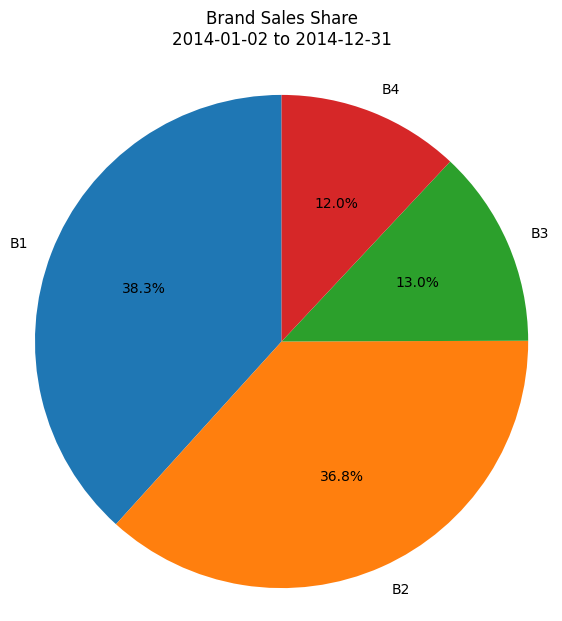

In [46]:
pie_chart_brands(df, date_start = "2014-01-02", date_end = "2014-12-31", brand_dict=brand_dict)


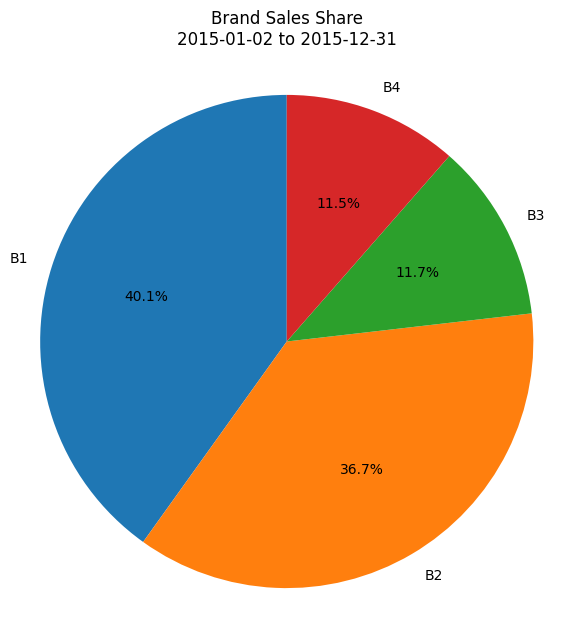

In [47]:
pie_chart_brands(df, date_start = "2015-01-02", date_end = "2015-12-31", brand_dict=brand_dict)


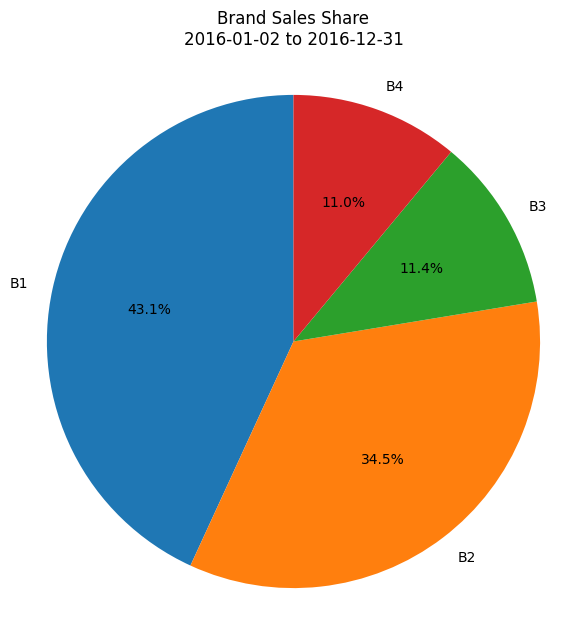

In [48]:
pie_chart_brands(df, date_start = "2016-01-02", date_end = "2016-12-31", brand_dict=brand_dict)

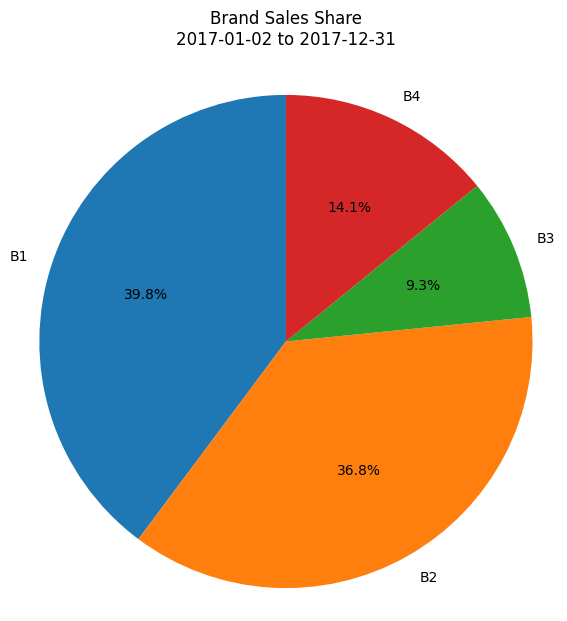

In [49]:
pie_chart_brands(df, date_start = "2017-01-02", date_end = "2017-12-31", brand_dict=brand_dict)

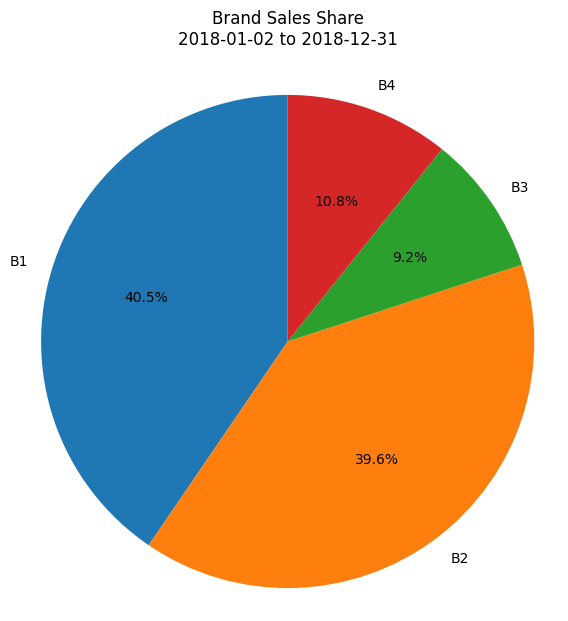

In [50]:
pie_chart_brands(df, date_start = "2018-01-02", date_end = "2018-12-31", brand_dict=brand_dict)

## Bar Plot: Stacked by Year - Items in Each Brand

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typing import Optional


def plot_brand_tiered_bars(
    df: pd.DataFrame,
    brand_name: str,
    top_n: Optional[int] = 20,
    rotate_xticks: int = 90,
):
    """
    Tiered (stacked-by-year) bar plot for a brand.
    
    X-axis: item labels (e.g., 1, 2, 3 ... from columns QTY_B{brand}_{item})
    Y-axis: sales quantity (sum over each year)
    Tiers: each stacked layer is a different year
    
    Parameters
    ----------
    df : DataFrame with DATE and QTY_* columns
    brand_name : e.g., "B1", "B2", ...
    date_col : name of the datetime column (default "DATE")
    top_n : show only the top-N items by total sales for readability (None = show all)
    rotate_xticks : degrees to rotate x tick labels
    """

    dates = pd.to_datetime(df.index, errors="coerce")
        
    brand_prefix = f"QTY_{brand_name}_"
    brand_cols = [c for c in df.columns if c.startswith(brand_prefix)]
    if not brand_cols:
        raise ValueError(f"No quantity columns found for brand '{brand_name}'. Expected prefix '{brand_prefix}'.")
    
    # Year extraction
    df_year = df.copy()
    df_year["__YEAR__"] = dates.year
    years = sorted(df_year["__YEAR__"].dropna().unique())
    
    # Choose items (optionally top-N by total sales over all years)
    totals = df_year[brand_cols].sum().sort_values(ascending=False)
    keep_cols = totals.index.tolist() if top_n is None else totals.head(top_n).index.tolist()
    
    # Item labels (take the trailing part after QTY_Bx_)
    item_labels = [col.split("_")[-1] for col in keep_cols]
    
    # Build stacked values: one array per year aligned to keep_cols
    stacked_vals = []
    for y in years:
        yearly_sum = df_year.loc[df_year["__YEAR__"] == y, keep_cols].sum().to_numpy()
        stacked_vals.append(yearly_sum)
    
    # Plot
    x = np.arange(len(keep_cols))
    fig_w = max(10, len(keep_cols) * 0.45)  # widen if many items
    fig, ax = plt.subplots(figsize=(fig_w, 6))
    
    bottom = np.zeros(len(keep_cols))
    for y, vals in zip(years, stacked_vals):
        ax.bar(x, vals, bottom=bottom, label=str(int(y)))
        bottom += vals
    
    ax.set_xticks(x)
    ax.set_xticklabels(item_labels, rotation=rotate_xticks, ha="right")
    ax.set_xlabel("Item")
    ax.set_ylabel("Sales quantity (units)")
    ax.set_title(f"Brand {brand_name} - Stacked-by-year ")
    ax.legend(title="Year", ncol=min(4, len(years)))
    ax.grid(True, axis="y", alpha=0.3)
    ax.margins(x=0.01)
    plt.tight_layout()
    plt.show()

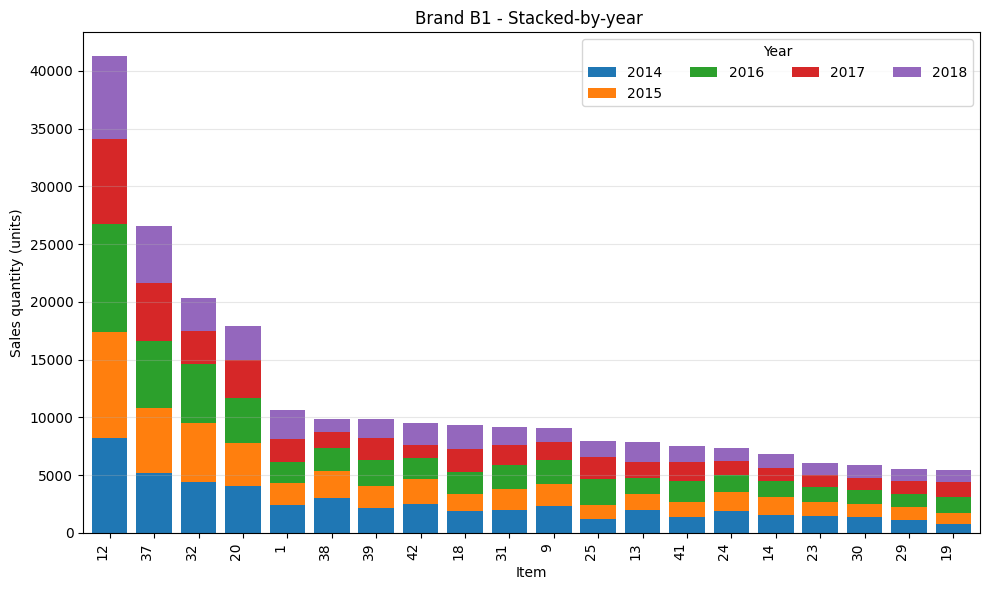

In [52]:
# change brand_name ("B1", "B2", "B3", "B4") and top_n as needed
plot_brand_tiered_bars(df, brand_name="B1", top_n=20)

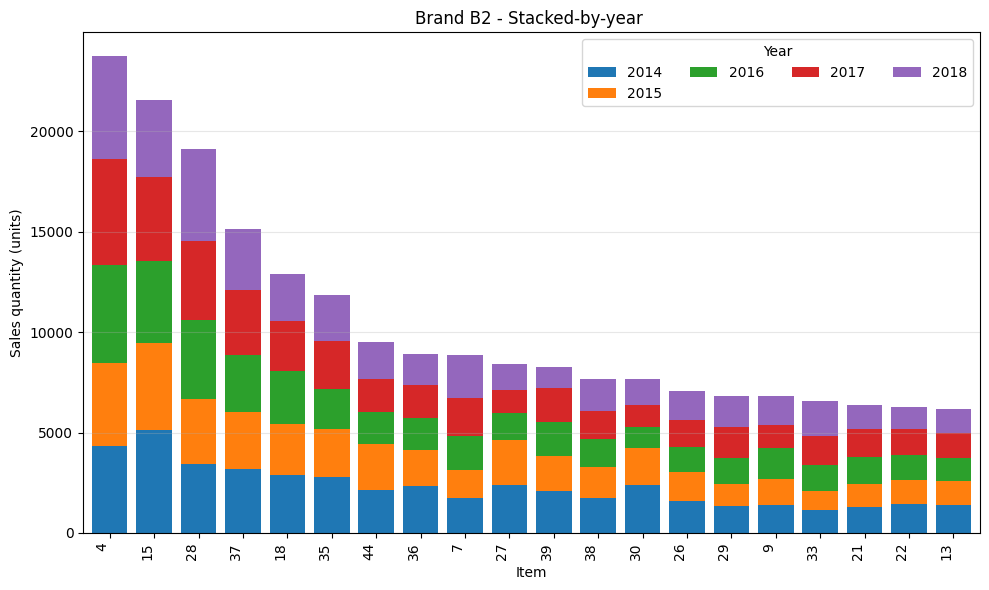

In [53]:
plot_brand_tiered_bars(df, brand_name="B2", top_n=20)

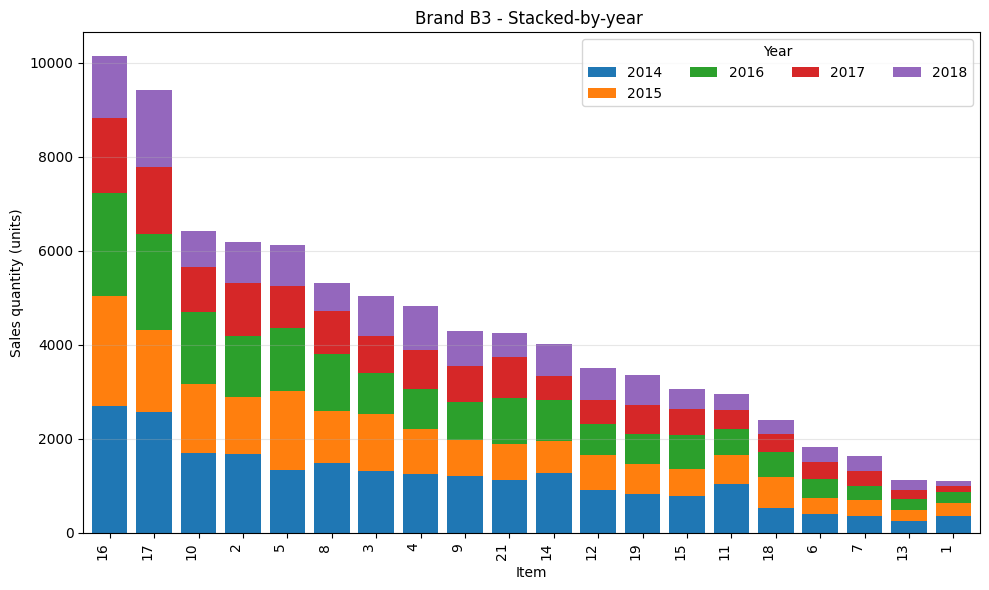

In [54]:
plot_brand_tiered_bars(df, brand_name="B3", top_n=20)

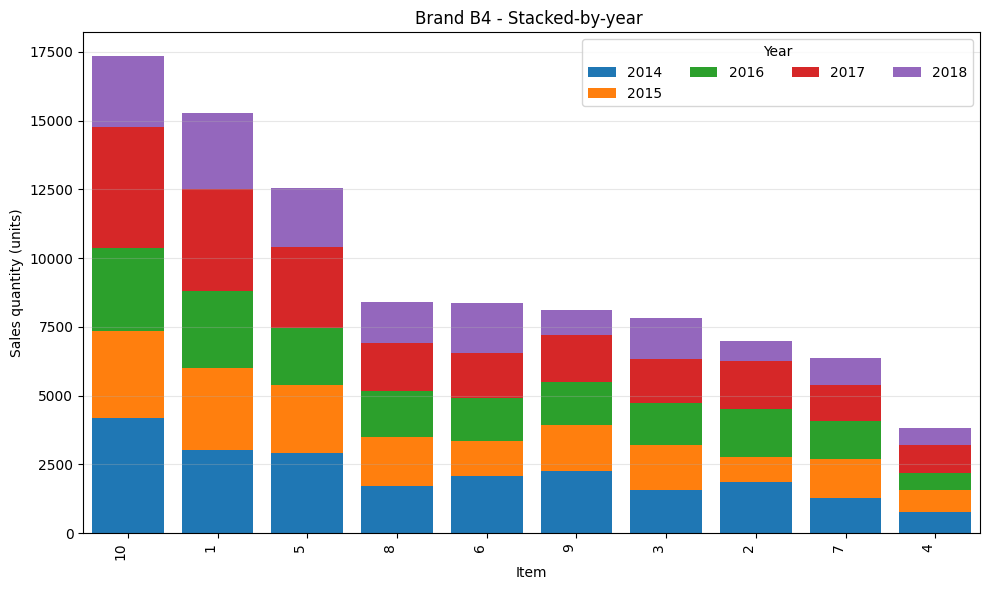

In [55]:
plot_brand_tiered_bars(df, brand_name="B4", top_n=20)

## Promotion Impact Analysis

Let's plot the impact of promotions in a chart

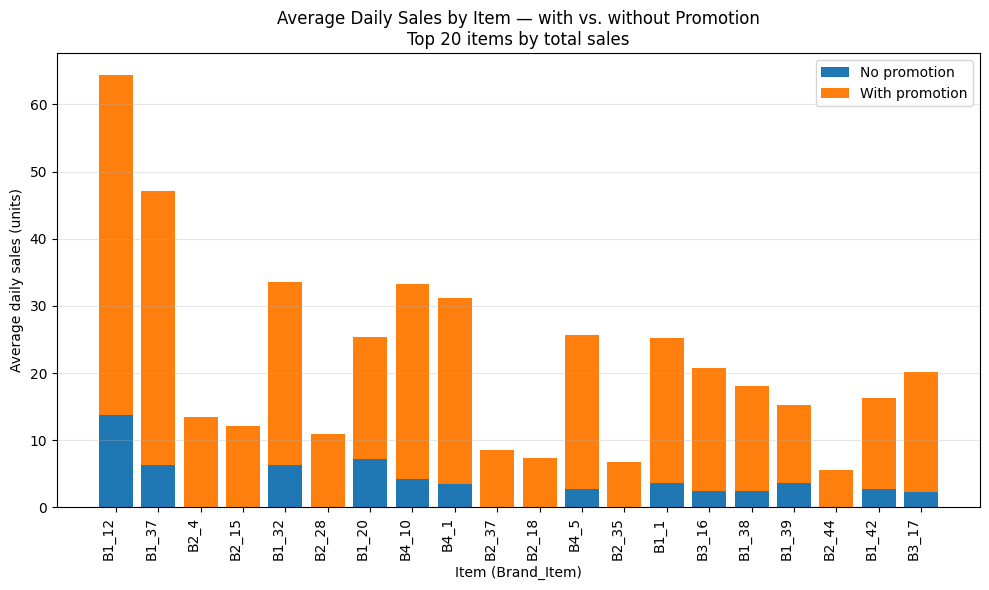

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typing import Optional



def promotion_impact_plot(
    df: pd.DataFrame,
    top_n: int = 20,
    brand_filter: Optional[str] = None,
    qty_prefix: str = "QTY_",
    promo_prefix: str = "PROMO_",
):
    # Find matching (qty, promo) pairs by suffix (e.g., "B1_1")
    qty_cols = [c for c in df.columns if c.startswith(qty_prefix)]
    promo_cols = [c for c in df.columns if c.startswith(promo_prefix)]
    
    def suffix(name, prefix):
        return name[len(prefix):]
    
    qty_map = {suffix(c, qty_prefix): c for c in qty_cols}
    promo_map = {suffix(c, promo_prefix): c for c in promo_cols}
    common_suffixes = sorted(set(qty_map.keys()) & set(promo_map.keys()))
    
    if brand_filter is not None:
        common_suffixes = [s for s in common_suffixes if s.split("_")[0] == brand_filter]
    
    stats = []
    for sfx in common_suffixes:
        q_col = qty_map[sfx]
        p_col = promo_map[sfx]
        
        p = df[p_col] == 1
        np_mask = df[p_col] == 0
        
        promo_days = int(p.sum())
        no_promo_days = int(np_mask.sum())
        
        promo_qty_sum = float(df.loc[p, q_col].sum())
        no_promo_qty_sum = float(df.loc[np_mask, q_col].sum())
        total_qty = float(df[q_col].sum())
        
        promo_avg = float(df.loc[p, q_col].mean()) if promo_days > 0 else 0.0
        no_promo_avg = float(df.loc[np_mask, q_col].mean()) if no_promo_days > 0 else 0.0
        overall_avg = float(df[q_col].mean())
        
        brand = sfx.split("_")[0]
        item_id = sfx.split("_")[1] if "_" in sfx else sfx
        
        stats.append({
            "item_key": sfx,
            "brand": brand,
            "item": item_id,
            "promo_days": promo_days,
            "no_promo_days": no_promo_days,
            "promo_qty_sum": promo_qty_sum,
            "no_promo_qty_sum": no_promo_qty_sum,
            "promo_avg": promo_avg,
            "no_promo_avg": no_promo_avg,
            "total_qty": total_qty,
            "overall_avg": overall_avg,
        })
    
    stats_df = pd.DataFrame(stats)
    if stats_df.empty:
        raise ValueError("No items found with matching QTY_ and PROMO_ columns (after filtering).")
    
    top_df = stats_df.sort_values("total_qty", ascending=False).head(top_n)
    
    labels = top_df["item_key"].tolist()
    base = top_df["no_promo_avg"].to_numpy()
    stack = top_df["promo_avg"].to_numpy()
    
    x = np.arange(len(labels))
    fig_w = max(10, len(labels) * 0.45)
    fig, ax = plt.subplots(figsize=(fig_w, 6))
    ax.bar(x, base, label="No promotion")
    ax.bar(x, stack, bottom=base, label="With promotion")
    
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=90, ha="right")
    brand_note = f" (Brand {brand_filter})" if brand_filter else ""
    ax.set_title(f"Average Daily Sales by Item — with vs. without Promotion{brand_note}\nTop {top_n} items by total sales")
    ax.set_xlabel("Item (Brand_Item)")
    ax.set_ylabel("Average daily sales (units)")
    ax.legend()
    ax.grid(True, axis="y", alpha=0.3)
    plt.tight_layout()
    plt.show()
    

# Run for all brands, top 20
promotion_impact_plot(df, top_n=20, brand_filter=None)

## Heatmap: Days-of-Week Sales each year

Heatmap will help us identify recurring patterns on weekdays, which was not visible in the previous time-series visualization

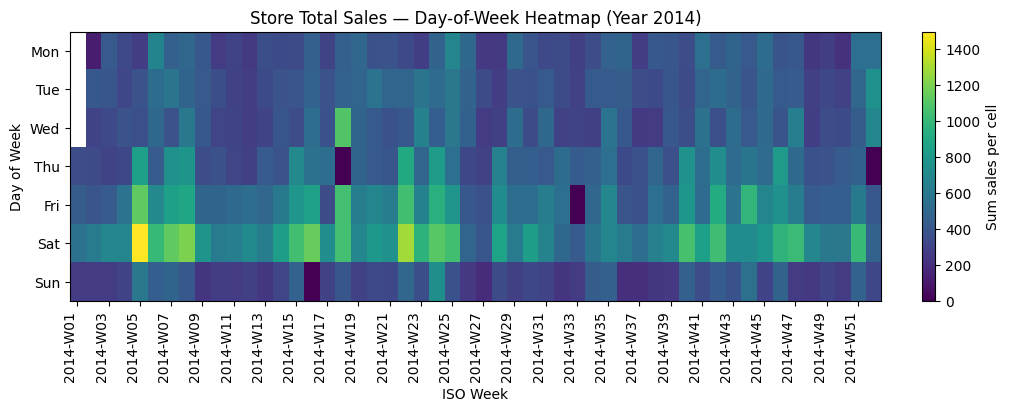

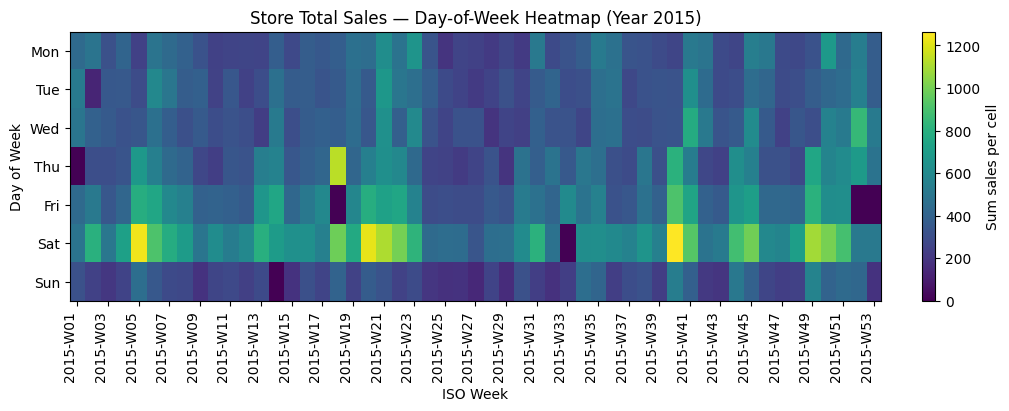

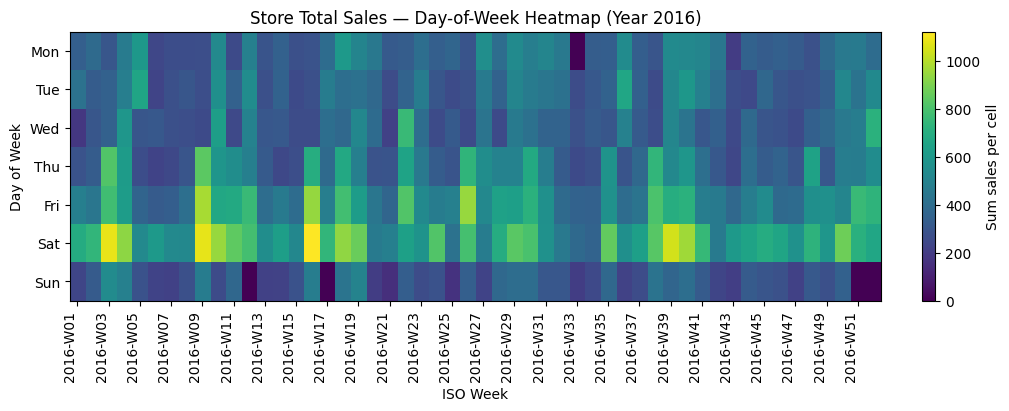

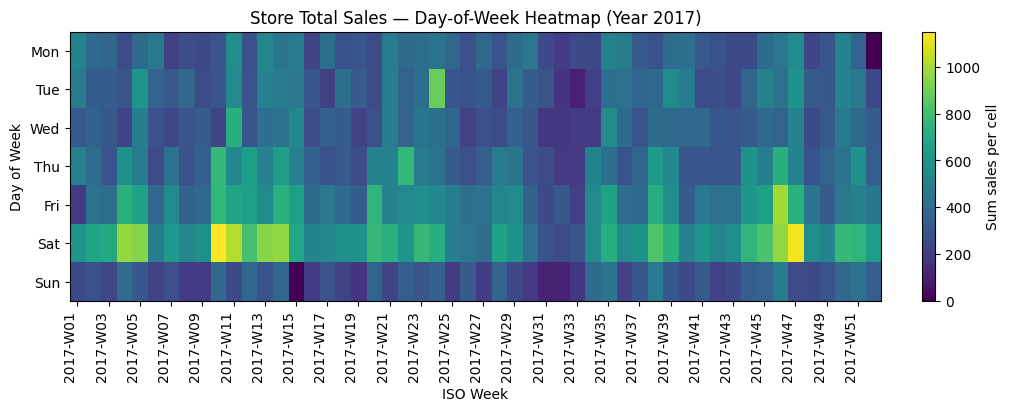

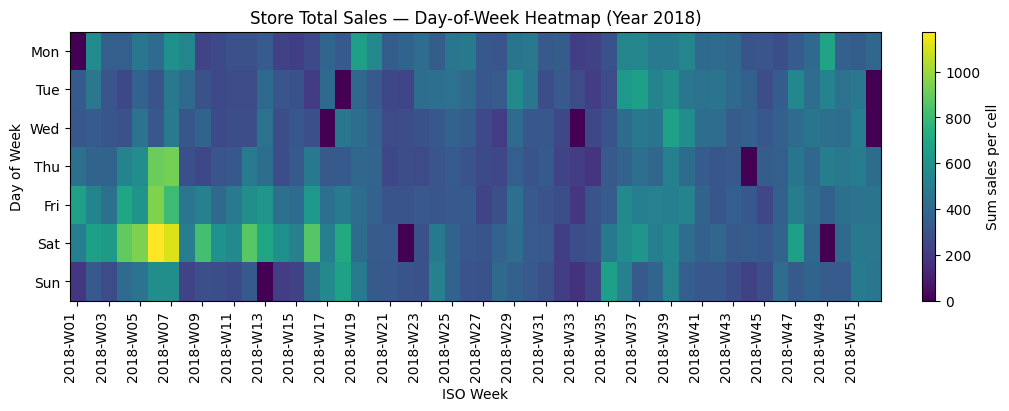

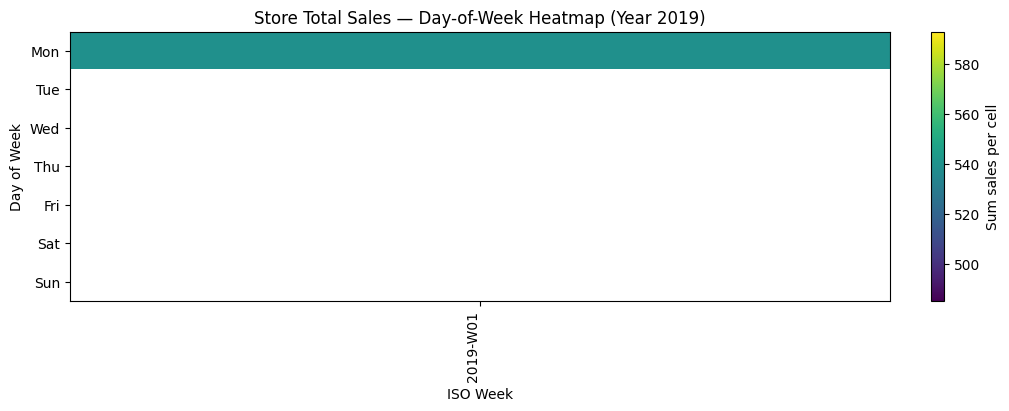

In [57]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def plot_store_dow_heatmap(
    df: pd.DataFrame,
    agg: str = "sum",
    per_year: bool = False,
):
    dates = pd.to_datetime(df.index, errors="coerce")
    if dates.isna().any():
        raise ValueError(f"Some values in index could not be parsed as datetime.")
    
    total_series = df["Total_QTY_Store"]
    tmp = pd.DataFrame({"DATE": dates, "total": total_series}).dropna(subset=["DATE"])
    
    iso = tmp["DATE"].dt.isocalendar()
    tmp["year"] = iso["year"].astype(int)
    tmp["week"] = iso["week"].astype(int)
    tmp["dow"] = tmp["DATE"].dt.dayofweek  # Monday=0
    
    def _plot_one(df_part: pd.DataFrame, title_suffix: str = ""):
        if agg == "mean":
            table = df_part.pivot_table(index="dow", columns=["year", "week"], values="total", aggfunc="mean")
        else:
            table = df_part.pivot_table(index="dow", columns=["year", "week"], values="total", aggfunc="sum")
        table = table.reindex(index=range(0, 7))
        data = table.to_numpy()
        
        fig_w = max(10, data.shape[1] * 0.15)
        fig, ax = plt.subplots(figsize=(fig_w, 4), constrained_layout=True)
        im = ax.imshow(data, aspect="auto")
        cbar = plt.colorbar(im, ax=ax)
        cbar.set_label(f"{'Sum' if agg=='sum' else 'Average'} sales per cell")
        
        ax.set_yticks(range(0,7))
        ax.set_yticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
        
        col_labels = [f"{y}-W{int(w):02d}" for (y, w) in table.columns]
        n_cols = len(col_labels)
        if n_cols > 0:
            step = max(1, n_cols // 20)
            ticks = np.arange(0, n_cols, step)
            ax.set_xticks(ticks)
            ax.set_xticklabels([col_labels[i] for i in ticks], rotation=90, ha="right")
        ax.set_xlabel("ISO Week")
        ax.set_ylabel("Day of Week")
        ax.set_title(f"Store Total Sales — Day-of-Week Heatmap{title_suffix}")
        plt.show()
    
    if per_year:
        for yr in sorted(tmp["year"].unique()):
            _plot_one(tmp[tmp["year"] == yr], title_suffix=f" (Year {yr})")
    else:
        _plot_one(tmp, title_suffix="")

# Plot the heatmap
plot_store_dow_heatmap(df, agg="sum", per_year=True)

# ML Model No. 1: Ridge Regreassion on Univariate Training on B1 Sales

This ML model will use **Ridge Regression** on only the B1 Sales

## Theory of Ridge Regression

Ridge finds weights $(w)$ by minimizing the Objective function:
$$
\underbrace{\sum_t (y_t - \hat{y}_t)^2}_{\text{fit error}}
\;+\;
\alpha \,\underbrace{\|w\|_2^2}_{\text{L2 penalty}}.
$$

- **$(\alpha = 0)$** → Ordinary Least Squares (no shrinkage; highest variance).
- **Larger $(\alpha)$** → Stronger shrinkage; coefficients move toward 0 (lower variance, higher bias).
- In scikit-learn’s `Ridge`, the **intercept is not penalized**; only feature weights are.

In [58]:
import tensorflow as tf

In [59]:
# Univariate forecasting on B1 sales using lag/rolling features + Ridge regression.
#
# ======================================================================
# Univariate forecasting on Brand_QTY_B1 sales only 
# (DATE is the index, daily continuity ensured, missing dates filled with 0.0)
# ======================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typing import List

from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [60]:
# check for missing values of date
missing_dates = [date for date in pd.date_range(start=df.index.min(), end=df.index.max(), freq='D') if date not in df.index]

missing_dates

if len(missing_dates) == 0:
    print("All dates from 2014-01-02 to 2018-12-31 are present\nNo Missing Values")

All dates from 2014-01-02 to 2018-12-31 are present
No Missing Values


In [61]:
# Ensure sorted & daily continuity (no reindexing needed)
df = df.sort_index()

## Select B1 Series

In [62]:
# ----------------------------------------------------------------------
# 1) Select Target Time Series: Brand_QTY_B1
# ----------------------------------------------------------------------

# Target series (already daily and aligned)
ts = df["Brand_QTY_B1"].astype(float).fillna(0.0)
ts.index.name = "DATE"

In [63]:
ts

DATE
2014-01-02    101.0
2014-01-03    136.0
2014-01-04    162.0
2014-01-05    106.0
2014-01-06     47.0
              ...  
2018-12-27    203.0
2018-12-28    192.0
2018-12-29    158.0
2018-12-30    182.0
2018-12-31    243.0
Name: Brand_QTY_B1, Length: 1825, dtype: float64

This is the time series we will train on

## Feature Engieering: Lags, Rolling stats, Calendar Encoding

In [64]:
# ----------------------------------------------------------------------
# 2) Feature engineering: lags, rolling stats, simple calendar encodings
# ----------------------------------------------------------------------
def make_features(y: pd.Series,
                  lags: List[int] = [1, 7, 14, 28],
                  roll_windows: List[int] = [7, 28],
                  add_calendar: bool = True):
    """Create a feature matrix X (df_feat) aligned with target y_out from a univariate daily series.
    Parameters
    ----------
    y : pd.Series
        The target time series on which to forecast (in this case, ts)
    lags : List[int], optional
        List of lagged features to create (default is [1, 7, 14, 28]).
    roll_windows : List[int], optional
        List of rolling window statistics to create (default is [7, 28], rolling window sizes).
    add_calendar : bool, optional
        Whether to add calendar features (default is True).
    ----------
    """
    df_feat = pd.DataFrame({"y": y})

    # Lag features
    for L in lags:
        df_feat[f"lag_{L}"] = y.shift(L)  # creates lag features (will also shorten index to prevent backfilling with -ve values)
        # lag features are simply the target variable shifted by L days
        # it is the 'recent history' that we want to look at

    # Rolling features (shifted by 1 to avoid leakage)
    for W in roll_windows:
        df_feat[f"roll_mean_{W}"] = y.shift(1).rolling(window=W, min_periods=1).mean()
        df_feat[f"roll_std_{W}"]  = y.shift(1).rolling(window=W, min_periods=1).std().fillna(0.0)

    if add_calendar:
        idx = y.index
        # Day-of-week (one-hot encoding)
        dow = pd.get_dummies(idx.dayofweek, prefix="dow")
        dow.index = idx
        df_feat = pd.concat([df_feat, dow], axis=1)
        # Month cyclic encoding 
        # Encode months on a cycle so that december is close to January, ensuring seasonal patterns
        month = idx.month
        df_feat["month_sin"] = np.sin(2 * np.pi * month / 12.0)
        df_feat["month_cos"] = np.cos(2 * np.pi * month / 12.0)
        # These help understand weekly, monthly seasonal patterns

    # Drop rows with NaNs from shifting (prevent out of bounds problems)
    # prevent -ve or NaN values from backfilling due to shifting in Lag features
    df_feat = df_feat.dropna()
    # Hence will shorten the dataframe index by 28 days (max Lag length)

    y_out = df_feat["y"].copy()
    X = df_feat.drop(columns=["y"])
    return X, y_out

X_all, y_all = make_features(ts)

In [65]:
# Feature Matrix for training
X_all

,lag_1,lag_7,lag_14,lag_28,roll_mean_7,roll_std_7,roll_mean_28,roll_std_28,dow_0,dow_1,dow_2,dow_3,dow_4,dow_5,dow_6,month_sin,month_cos
DATE,,,,,,,,,,,,,,,,,
2014-01-30,120.0,111.0,100.0,101.0,143.857143,56.904682,136.464286,47.536717,False,False,False,True,False,False,False,5.000000e-01,0.866025
2014-01-31,144.0,181.0,133.0,136.0,148.571429,55.066194,138.000000,47.040566,False,False,False,False,True,False,False,5.000000e-01,0.866025
2014-02-01,181.0,256.0,250.0,162.0,148.571429,55.066194,139.607143,47.733317,False,False,False,False,False,True,False,8.660254e-01,0.500000
2014-02-02,302.0,113.0,97.0,106.0,155.142857,70.581935,144.607143,56.662967,False,False,False,False,False,False,True,8.660254e-01,0.500000
2014-02-03,97.0,91.0,124.0,47.0,152.857143,72.409549,144.285714,56.915049,True,False,False,False,False,False,False,8.660254e-01,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27,0.0,187.0,145.0,130.0,138.857143,96.482172,132.500000,57.256732,False,False,False,True,False,False,False,-2.449294e-16,1.000000
2018-12-28,203.0,182.0,138.0,111.0,141.142857,97.990524,135.107143,58.780407,False,False,False,False,True,False,False,-2.449294e-16,1.000000
2018-12-29,192.0,204.0,138.0,139.0,142.571429,98.755349,138.000000,59.538347,False,False,False,False,False,True,False,-2.449294e-16,1.000000


In [66]:
y_all

DATE
2014-01-30    144.0
2014-01-31    181.0
2014-02-01    302.0
2014-02-02     97.0
2014-02-03    141.0
              ...  
2018-12-27    203.0
2018-12-28    192.0
2018-12-29    158.0
2018-12-30    182.0
2018-12-31    243.0
Name: y, Length: 1797, dtype: float64

Notice the lenght is shortened by 28 to accoomodate for lag_28

## Split: Time-aware split (train/test/vald) by horizon lengths

In [67]:
# ----------------------------------------------------------------------
# 3) Time-aware split (train/valid/test) by horizon lengths
# ----------------------------------------------------------------------
test_horizon  = 365   # last 365 days for final evaluation
valid_horizon = 365   # preceding 365 days for model selection

n = len(y_all)
if n < (test_horizon + valid_horizon + 30):
    # Ensure we have enough history; shrink horizons if needed
    valid_horizon = max(60, min(valid_horizon, n // 5))
    test_horizon  = max(60, min(test_horizon,  n // 5))

test_start  = n - test_horizon
valid_start = test_start - valid_horizon

X_train, y_train = X_all.iloc[:valid_start], y_all.iloc[:valid_start]
X_valid, y_valid = X_all.iloc[valid_start:test_start], y_all.iloc[valid_start:test_start]
X_test,  y_test  = X_all.iloc[test_start:], y_all.iloc[test_start:]

print("Train range:", X_train.index.min().date(), "→", X_train.index.max().date(), f"({len(X_train)} days)")
print("Valid range:", X_valid.index.min().date(), "→", X_valid.index.max().date(), f"({len(X_valid)} days)")
print("Test  range:", X_test.index.min().date(),  "→", X_test.index.max().date(),  f"({len(X_test)} days)")

Train range: 2014-01-30 → 2016-12-31 (1067 days)
Valid range: 2017-01-01 → 2017-12-31 (365 days)
Test  range: 2018-01-01 → 2018-12-31 (365 days)


## Evaluation Metrics

In [68]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_error 
import numpy as np

In [69]:
# ----------------------------------------------------------------------
# 4) Baselines: naive and seasonal naive
# ----------------------------------------------------------------------
def rmse(y_true, y_pred): 
    return np.sqrt(mean_squared_error(y_true, y_pred))

def smape(y_true, y_pred, eps=1e-8):
    a = np.abs(y_true - y_pred)
    b = (np.abs(y_true) + np.abs(y_pred) + eps) / 2.0
    return np.mean(a / b) * 100.0


import numpy as np
import pandas as pd

def mase(y_true, y_pred, insample, m: int = 7, eps: float = 1e-8):
    """
    Mean Absolute Scaled Error (MASE).
    Scales the model's MAE on (y_true, y_pred) by the in-sample naive MAE,
    where naive uses a seasonal lag m (m=1 for non-seasonal; m=7 for weekly seasonality).

    Parameters
    ----------
    y_true : array-like
        Actual values on the evaluation split (e.g., test).
    y_pred : array-like
        Predicted values on the evaluation split.
    insample : array-like
        In-sample target series used to fit the final model (e.g., TRAIN+VALID y).
    m : int
        Seasonal period (7 for daily data with weekly seasonality; 1 if non-seasonal).
    eps : float
        Small constant to avoid division by zero when in-sample naive MAE is 0.

    Returns
    -------
    float : MASE value (unitless; <1 means better than seasonal naive on average).
    """
    insample = np.asarray(insample, dtype=float)
    if len(insample) <= m:
        raise ValueError("`insample` length must be > m for MASE computation.")
    denom = np.mean(np.abs(insample[m:] - insample[:-m]))  # in-sample seasonal naive MAE
    mae = np.mean(np.abs(np.asarray(y_true, dtype=float) - np.asarray(y_pred, dtype=float)))
    return mae / (denom + eps)

yhat_test_naive  = X_test["lag_1"].values
yhat_test_snaive = X_test["lag_7"].values  # lag_7 seasonal naive assumes seasonal recurring pattern every 7 days

## Manual Cross-Validation & Training

In [70]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [71]:
#---------------------------------------------------------------------
#     MANUAL Cross-Validation & Testing
#---------------------------------------------------------------------


# ----------------------------------------------------------------------
# 5) Model: Ridge Regression with a FIXED alpha (no grid search)
# ----------------------------------------------------------------------
alpha_value = 10.0  # <-- set the alpha we want to train with

pipe_manual = Pipeline([
    ("scaler", StandardScaler()),
    ("model", Ridge(alpha=alpha_value))  ##  Optimization function and optimizer defined by Ridge() in scikit learn
])

# Fit on TRAIN+VALID (same protocol as before, just without grid search)
pipe_manual.fit(pd.concat([X_train, X_valid]), pd.concat([y_train, y_valid]))

# ----------------------------------------------------------------------
# 6) Evaluate on TEST
# ----------------------------------------------------------------------
yhat_test = pipe_manual.predict(X_test)

metrics = pd.DataFrame([
    {"Model": "Naive (lag-1)", "RMSE": rmse(y_test, yhat_test_naive),
     "MAE": mean_absolute_error(y_test, yhat_test_naive), "sMAPE%": smape(y_test.values, yhat_test_naive)},
    {"Model": "Seasonal Naive (lag-7)", "RMSE": rmse(y_test, yhat_test_snaive),
     "MAE": mean_absolute_error(y_test, yhat_test_snaive), "sMAPE%": smape(y_test.values, yhat_test_snaive)},
    {"Model": f"ML Ridge reg (alpha={alpha_value})", "RMSE": rmse(y_test, yhat_test),
     "MAE": mean_absolute_error(y_test, yhat_test), "sMAPE%": smape(y_test.values, yhat_test)},
]).set_index("Model").round(3)

print(metrics)

                              RMSE     MAE  sMAPE%
Model                                             
Naive (lag-1)               70.373  46.178  32.523
Seasonal Naive (lag-7)     103.839  72.290  44.605
ML Ridge reg (alpha=10.0)   79.251  60.576  45.823


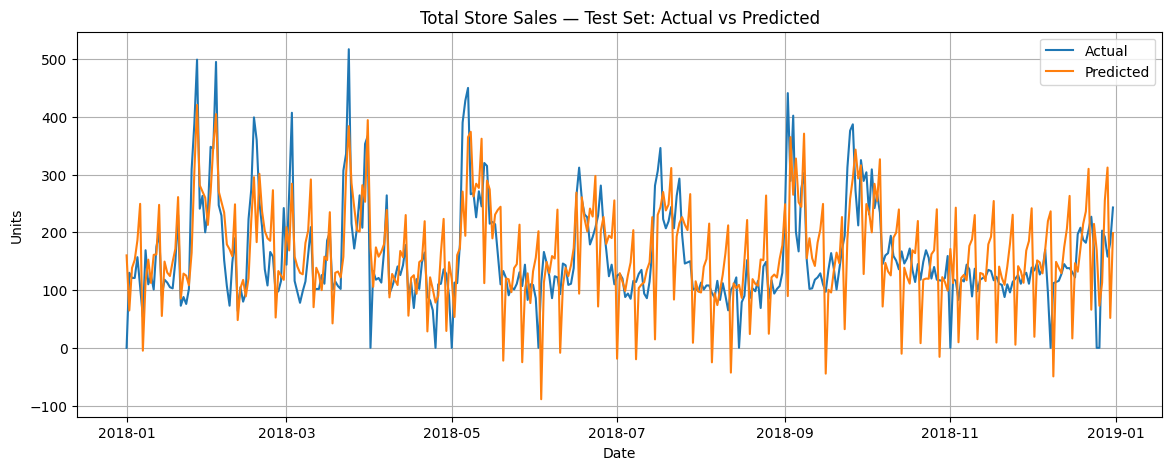

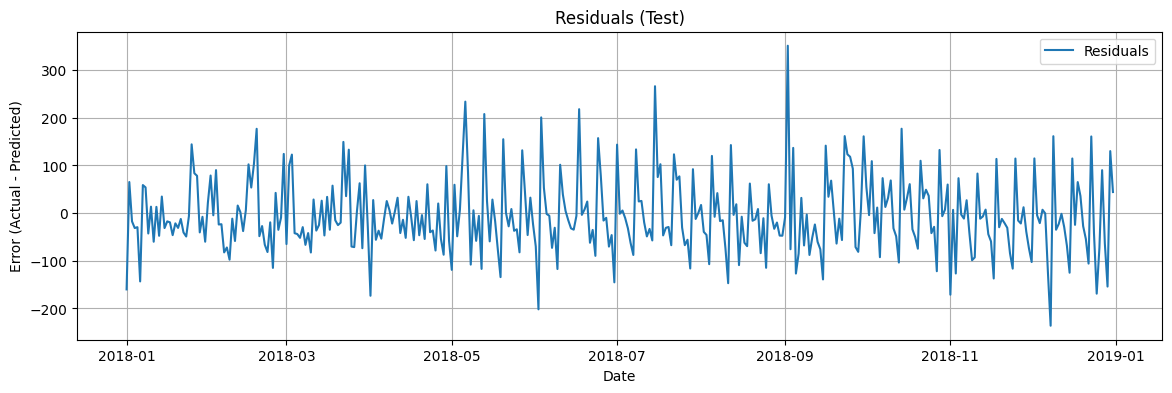

In [72]:
# ----------------------------------------------------------------------
# 7) Plots (matplotlib )
# ----------------------------------------------------------------------
plt.figure(figsize=(14,5))
plt.plot(y_test.index, y_test.values, label="Actual")
plt.plot(y_test.index, yhat_test, label="Predicted")
plt.title("Total Store Sales — Test Set: Actual vs Predicted")
plt.xlabel("Date")
plt.ylabel("Units")
plt.legend()
plt.grid(True)
plt.show()

resid = y_test.values - yhat_test
plt.figure(figsize=(14,4))
plt.plot(y_test.index, resid, label="Residuals")
plt.title("Residuals (Test)")
plt.xlabel("Date")
plt.ylabel("Error (Actual - Predicted)")
plt.legend()
plt.grid(True)
plt.show()

# Hyperparamter Tuning ML 1

## GridSearch Cross Validation

In [73]:
# ----------------------------------------------------------------------
# 5) Model: Ridge Regression with TimeSeriesSplit and grid search on alpha
# ----------------------------------------------------------------------
pipe = Pipeline([("scaler", StandardScaler()), ("model", Ridge())])

tscv = TimeSeriesSplit(n_splits=16)  # Splits into 4 folds of validation

# Cross Validation Parameter Grid
# Alpha
param_grid = {"model__alpha": [0.1, 1.0, 3.0, 10.0, 30.0, 100.0, 120.0, 140.0, 180.0, 200.0, 220.0, 260.0, 280.0, 300.0, 320.0, 330.0, 350.0, 400.0, 450.0, 500.0, 1000.0]} 
# Alpha is the L2 regularization parameter
# It helps prevent overfitting by penalizing large coefficients, allowing generalization in prediction, better performance in test


# GridSearch Cross-Validation
gcv = GridSearchCV(pipe, param_grid, scoring="neg_mean_squared_error", cv=tscv)
# RMSE metric used for Cross Validation, to pick the best model
# -ve RSME means better performance the closer to 0 (absolutes of larger negative numbers are smaller)

# Other cv scoring metrics
# scoring = "neg_mean_absolute_error"
# scoring = "neg_mean_absolute_percentage_error"
# scoring = "neg_mean_squared_error"
# scoring= "neg_root_mean_squared_error"


gcv.fit(X_train, y_train)

best_model = gcv.best_estimator_

# Refit on TRAIN+VALID
print("Best Model: from Grid Search")
best_model.fit(pd.concat([X_train, X_valid]), pd.concat([y_train, y_valid]))

Best Model: from Grid Search


Pipeline(steps=[('scaler', StandardScaler()), ('model', Ridge(alpha=30.0))])

## Explanation of Alpha Parameter

$\alpha$ (Alpha): We Tune Alpha

**Alpha** is the **L2-regularization strength** in Ridge regression — a knob that controls how much we shrink the model’s coefficients to combat overfitting.

---

### Ridge Regression: Objective Function (and role of Alpha)

Ridge finds weights $(w)$ by minimizing:
$$
\underbrace{\sum_t (y_t - \hat{y}_t)^2}_{\text{fit error}}
\;+\;
\alpha \,\underbrace{\|w\|_2^2}_{\text{L2 penalty}}.
$$

- **$(\alpha = 0)$** → Ordinary Least Squares (no shrinkage; highest variance).
- **Larger $(\alpha)$** → Stronger shrinkage; coefficients move toward 0 (lower variance, higher bias).
- In scikit-learn’s `Ridge`, the **intercept is not penalized**; only feature weights are.

---

### We Grid-Search Alpha

We don’t know beforehand how much shrinkage gives the best **out-of-sample** performance.  
So we try a set of values (e.g., `0.1, 1, 3, 10, 30, 100`) and use **time-aware cross-validation** to pick the $(\alpha)$ that forecasts best on later, unseen periods.

---

### Reasons for L2 regularization using Alpha

Our design matrix includes **lags, rolling stats, and calendar encodings**, which can be correlated. L2 regularization:

- **Stabilizes** estimates when features are collinear (common with many lags).
- **Reduces overfitting** to noise/idiosyncrasies.
- **Shrinks** weights but generally does **not** set them exactly to zero 


### Results- Best From Cross Validation

In [74]:
# ----------------------------------------------------------------------
# 6) Evaluate on TEST
# ----------------------------------------------------------------------
yhat_test = best_model.predict(X_test)

metrics = pd.DataFrame([
    {"Model": "Naive (lag-1)", "RMSE": rmse(y_test, yhat_test_naive),
     "MAE": mean_absolute_error(y_test, yhat_test_naive), "sMAPE%": smape(y_test.values, yhat_test_naive)},
    {"Model": "Seasonal Naive (lag-7)", "RMSE": rmse(y_test, yhat_test_snaive),
     "MAE": mean_absolute_error(y_test, yhat_test_snaive), "sMAPE%": smape(y_test.values, yhat_test_snaive)},
    {"Model": f"ML Ridge reg (alpha={gcv.best_params_['model__alpha']})", "RMSE": rmse(y_test, yhat_test),
     "MAE": mean_absolute_error(y_test, yhat_test), "sMAPE%": smape(y_test.values, yhat_test)},
]).set_index("Model").round(3)


print(metrics)

                              RMSE     MAE  sMAPE%
Model                                             
Naive (lag-1)               70.373  46.178  32.523
Seasonal Naive (lag-7)     103.839  72.290  44.605
ML Ridge reg (alpha=30.0)   78.215  59.751  45.051


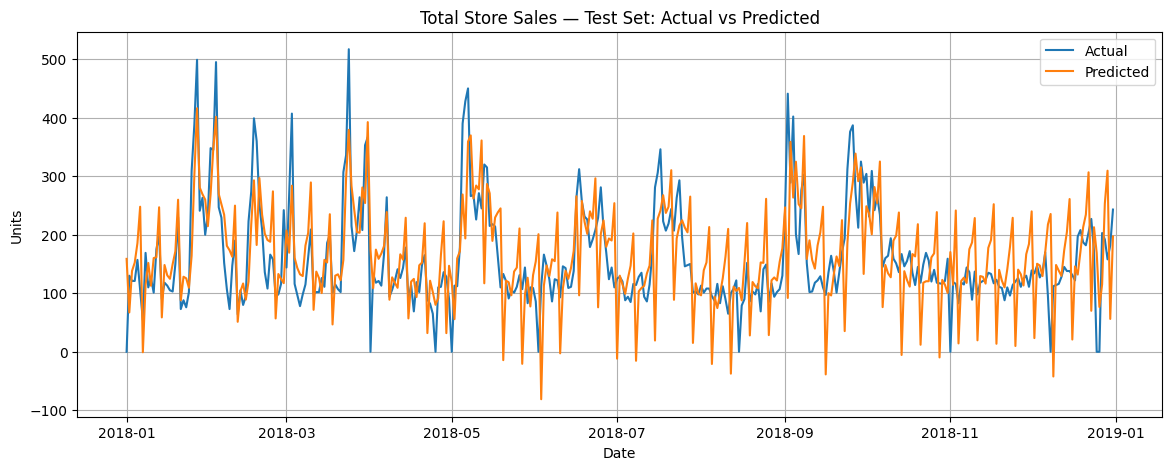

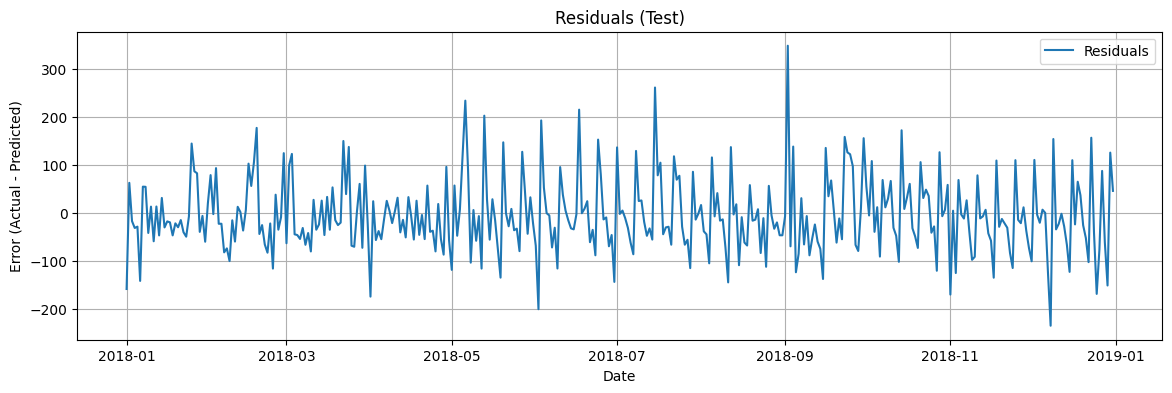

In [75]:
# ----------------------------------------------------------------------
# 7) Plots (matplotlib )
# ----------------------------------------------------------------------
plt.figure(figsize=(14,5))
plt.plot(y_test.index, y_test.values, label="Actual")
plt.plot(y_test.index, yhat_test, label="Predicted")
plt.title("Total Store Sales — Test Set: Actual vs Predicted")
plt.xlabel("Date")
plt.ylabel("Units")
plt.legend()
plt.grid(True)
plt.show()

resid = y_test.values - yhat_test
plt.figure(figsize=(14,4))
plt.plot(y_test.index, resid, label="Residuals")
plt.title("Residuals (Test)")
plt.xlabel("Date")
plt.ylabel("Error (Actual - Predicted)")
plt.legend()
plt.grid(True)
plt.show()

# ML Model No. 2: Hierarchical NDD on B1 Sales

Hierarchical info of the time series, such as all item level sales must add upto the brand level sales is implemented in this ML Model.

For Simplicity, we compute with Brand B1 Sales at first

In [76]:
import numpy as np
import pandas as pd
from typing import Dict, List, Tuple

# Keras / TensorFlow
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

## Initial Setup

In [77]:
# ---------------------------------------------------------------
# 0) Configuration
# ---------------------------------------------------------------
# - df: DataFrame with DATE index (daily), item-level QTY_B1_i and PROMO_B1_i columns
# - brand_dict: dict mapping brand -> list of item ids as provided

assert isinstance(df.index, pd.DatetimeIndex), "df.index must be a DatetimeIndex"
df = df.sort_index()

BRAND = "B1"
WINDOW = 30
HOP = 1
TRAIN_START = pd.Timestamp("2014-01-01")
TRAIN_END   = pd.Timestamp("2017-12-31")
TEST_START  = pd.Timestamp("2018-01-01")
TEST_END    = pd.Timestamp("2018-12-31")

# Clamp dates to available data
TRAIN_START = max(TRAIN_START, df.index.min())
TEST_END    = min(TEST_END, df.index.max())

## Utils: Brand Info & Exogenous Variables Extraction

### Exogenous Variable Extraction for Brand

In [78]:
# ---------------------------------------------------------------
# 1) Utilities to extract brand & item series and exogenous features
# ---------------------------------------------------------------

from typing import Dict, List

def get_items_for_brand(brand: str) -> List[str]:
    items = brand_dict.get(brand, [])
    if not items:
        raise ValueError(f"No items found for brand {brand} in brand_dict.")
    return items


def get_brand_series(frame: pd.DataFrame, brand: str) -> pd.Series:
    # If a precomputed brand column exists, prefer it
    col = f"Brand_QTY_{brand}"
    if col in frame.columns:
        y = frame[col].astype(float)
    else:
        # Sum item-level quantities
        items = get_items_for_brand(brand)
        qty_cols = [f"QTY_{brand}_{i}" for i in items if f"QTY_{brand}_{i}" in frame.columns]
        if not qty_cols:
            raise ValueError(f"No QTY columns for {brand} present in df.")
        y = frame[qty_cols].sum(axis=1).astype(float)
    return y.asfreq("D").fillna(0.0)


def build_brand_exog(frame: pd.DataFrame, brand: str) -> pd.DataFrame:
    ex = pd.DataFrame(index=frame.index)
    # Promo share = relative number of items under promo for this brand
    items = get_items_for_brand(brand)
    promo_cols = [f"PROMO_{brand}_{i}" for i in items if f"PROMO_{brand}_{i}" in frame.columns]
    if promo_cols:
        ex["promo_share"] = frame[promo_cols].sum(axis=1) / float(len(promo_cols))
    else:
        ex["promo_share"] = 0.0
    # Calendar dummies: DOW & Month (drop_first to avoid dummy trap if intercept exists)
    dow = pd.get_dummies(frame.index.dayofweek, prefix="dow", drop_first=True)
    mon = pd.get_dummies(frame.index.month,     prefix="mon", drop_first=True)
    dow.index = ex.index; mon.index = ex.index
    ex = pd.concat([ex, dow, mon], axis=1).astype(float)
    return ex.asfreq("D").fillna(0.0)


def build_item_exog(frame: pd.DataFrame, brand: str, items: List[str]) -> Dict[str, pd.DataFrame]:
    # Shared calendar dummies
    dow = pd.get_dummies(frame.index.dayofweek, prefix="dow", drop_first=True)
    mon = pd.get_dummies(frame.index.month,     prefix="mon", drop_first=True)
    dow.index = frame.index; mon.index = frame.index
    calendar = pd.concat([dow, mon], axis=1).astype(float)

    exog = {}
    for it in items:
        promo_col = f"PROMO_{brand}_{it}"
        if promo_col in frame.columns:
            promo = frame[[promo_col]].astype(float)
        else:
            promo = pd.DataFrame({promo_col: np.zeros(len(frame), dtype=float)}, index=frame.index)
        exog[it] = pd.concat([promo, calendar], axis=1).asfreq("D").fillna(0.0)
    return exog


def get_items_matrix(frame: pd.DataFrame, brand: str, items: List[str]) -> pd.DataFrame:
    cols = [f"QTY_{brand}_{it}" for it in items if f"QTY_{brand}_{it}" in frame.columns]
    if len(cols) != len(items):
        missing = [it for it in items if f"QTY_{brand}_{it}" not in frame.columns]
        raise ValueError(f"Missing QTY columns for items: {missing}")
    return frame[cols].astype(float).asfreq("D").fillna(0.0)

### Window Functions

In [79]:
# ---------------------------------------------------------------
# 2) Window builders
# ---------------------------------------------------------------

def build_brand_sequences(y: pd.Series, X: pd.DataFrame, window: int = 30, hop: int = 1,
                          scaler_y: StandardScaler = None, scaler_X: StandardScaler = None):
    """Return y_seq (N,w,1), X_seq (N,w,nx), y_tgt (N,), idx (N,) — scaled via provided scalers.
    Fits scalers if None, using only the rows whose target index is <= TRAIN_END.
    """
    assert y.index.equals(X.index)
    # Build raw sequences first (unscaled)
    vals_y = y.values.astype(float)
    vals_X = X.values.astype(float)
    n, nx = len(y), X.shape[1]

    y_seq_list, X_seq_list, y_tgt_list, idx_list = [], [], [], []
    t = window
    while t < n:
        y_seq_list.append(vals_y[t-window:t].reshape(window, 1))
        X_seq_list.append(vals_X[t-window:t].reshape(window, nx))
        y_tgt_list.append(vals_y[t])
        idx_list.append(y.index[t])
        t += hop

    y_seq = np.stack(y_seq_list, axis=0)
    X_seq = np.stack(X_seq_list, axis=0)
    y_tgt = np.array(y_tgt_list, dtype=float)
    idx = pd.to_datetime(pd.Index(idx_list))

    # Fit scalers on in-sample targets (up to TRAIN_END)
    if scaler_y is None:
        scaler_y = StandardScaler()
        ins_mask = (idx <= TRAIN_END)
        scaler_y.fit(y_tgt[ins_mask].reshape(-1,1))
    if scaler_X is None:
        scaler_X = StandardScaler()
        # To fit X scaler, take all windows whose target <= TRAIN_END
        ins_mask = (idx <= TRAIN_END)
        X_ins = X_seq[ins_mask].reshape(ins_mask.sum()*window, nx)
        scaler_X.fit(X_ins)

    # Apply scaling
    y_tgt_sc = scaler_y.transform(y_tgt.reshape(-1,1)).ravel()
    X_seq_sc = scaler_X.transform(X_seq.reshape(-1, nx)).reshape(-1, window, nx)
    y_seq_sc = scaler_y.transform(y_seq.reshape(-1,1)).reshape(-1, window, 1)

    return y_seq_sc, X_seq_sc, y_tgt_sc, idx, scaler_y, scaler_X


def build_item_disagg_sequences(
    y_brand: pd.Series,
    Y_items: pd.DataFrame,
    item_exog: Dict[str, pd.DataFrame],
    window: int = 30,
    hop: int = 1,
) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray, pd.DatetimeIndex]:
    """
    Build sequences for disaggregation model.
    Returns:
      - yB_seq:   (N, w, 1)    brand history (UNSCALED)
      - Xitem_seq:(N, I, w, m) per-item exog windows (UNSCALED)
      - yB_t:     (N,)         brand scalar target at t (UNSCALED)
      - Yitem_t:  (N, I)       item targets at t (UNSCALED)
      - idx:      (N,)         target timestamps
    """
    items = [c.split("_")[-1] for c in Y_items.columns]
    n_items = len(items)

    # infer item exog width (all items share schema)
    any_item = items[0]
    m = item_exog[any_item].shape[1]

    vals_yB = y_brand.values.astype(float)
    vals_items = Y_items.values.astype(float)  # shape (T, I)
    n = len(y_brand)

    yB_seq_list, Xitem_seq_list, yB_t_list, Yitem_t_list, idx_list = [], [], [], [], []

    t = window
    while t < n:
        # brand history
        yB_seq_list.append(vals_yB[t-window:t].reshape(window, 1))
        # per-item exog windows
        per_item_windows = []
        for it in items:
            Xi = item_exog[it].values.astype(float)
            per_item_windows.append(Xi[t-window:t].reshape(window, m))
        Xitem_seq_list.append(np.stack(per_item_windows, axis=0))  # (I, w, m)
        # targets
        yB_t_list.append(vals_yB[t])
        Yitem_t_list.append(vals_items[t, :])
        idx_list.append(y_brand.index[t])
        t += hop

    yB_seq   = np.stack(yB_seq_list, axis=0)                      # (N, w, 1)
    Xitem_seq= np.stack(Xitem_seq_list, axis=0)                   # (N, I, w, m)
    yB_t     = np.array(yB_t_list, dtype=float)                   # (N,)
    Yitem_t  = np.stack(Yitem_t_list, axis=0).astype(float)       # (N, I)
    idx      = pd.to_datetime(pd.Index(idx_list))

    return yB_seq, Xitem_seq, yB_t, Yitem_t, idx


## ML Model: NDD

In [80]:
# ---------------------------------------------------------------
# 3) Models
# ---------------------------------------------------------------

def build_brand_cnn_mlp(window: int, n_exog: int) -> Model:
    # y branch
    inp_y = layers.Input(shape=(window, 1), name="y_seq")
    a = layers.Conv1D(16, 3, padding="causal", activation="relu")(inp_y)
    a = layers.Conv1D(16, 3, padding="causal", activation="relu")(a)
    a = layers.GlobalAveragePooling1D()(a)
    # X branch
    inp_x = layers.Input(shape=(window, n_exog), name="x_seq")
    b = layers.Flatten()(inp_x)
    b = layers.Dense(64, activation="relu")(b)
    # fuse
    h = layers.Concatenate()([a, b])
    h = layers.Dense(64, activation="relu")(h)
    out = layers.Dense(1, name="yhat_scaled")(h)  # trained in scaled space
    model = Model([inp_y, inp_x], out)
    model.compile(optimizer="adam", loss="mse")
    return model

In [81]:
#  Disaggreation model architecture

#    NDD 

def build_disagg_nnd(window: int, n_items: int, n_item_exog: int,
                     brand_latent_dim: int = 16) -> Model:
    """NND that outputs per-item forecasts coherent with the brand scalar.
    Inputs:
      - yB_seq: (w,1) brand history
      - Xitem_seq: (I,w,m) per-item exog sequence
      - yB_scalar: (1,) brand scalar at target time (true for training, forecast at inference)
    Output:
      - Yitem_pred: (I,) per-item forecasts that sum to yB_scalar (softmax shares * scalar)
    """
    # Brand branch
    inp_yB = layers.Input(shape=(window, 1), name="yB_seq")
    a = layers.Conv1D(brand_latent_dim, 3, padding="causal", activation="relu")(inp_yB)
    a = layers.GlobalAveragePooling1D()(a)  # (batch, brand_latent_dim)

    # Per-item exog branch
    inp_Xi = layers.Input(shape=(n_items, window, n_item_exog), name="Xitem_seq")
    # Flatten time+features for each item, keep item axis
    z = layers.Reshape((n_items, window * n_item_exog))(inp_Xi)
    z = layers.TimeDistributed(layers.Dense(64, activation="relu"))(z)
    z = layers.TimeDistributed(layers.Dense(32, activation="relu"))(z)  # (batch, I, 32)

    # Repeat brand latent across items and fuse
    a_rep = layers.RepeatVector(n_items)(a)  # (batch, I, brand_latent_dim)
    u = layers.Concatenate(axis=-1)([z, a_rep])  # (batch, I, 32+latent)
    u = layers.TimeDistributed(layers.Dense(32, activation="relu"))(u)
    logits = layers.TimeDistributed(layers.Dense(1))(u)  # (batch, I, 1)
    logits = layers.Reshape((n_items,))(logits)           # (batch, I)

    # This part ensures coherence as sums to 1 for the brand level
    shares = layers.Softmax(axis=-1, name="shares")(logits)  # sums to 1 across items

    # Multiply by brand scalar to get coherent item forecasts
    inp_yB_scalar = layers.Input(shape=(1,), name="yB_scalar")  # (batch,1)
    yB_rep = layers.Concatenate()([inp_yB_scalar for _ in range(n_items)])  # (batch, I)
    y_items_pred = layers.Multiply(name="Yitem_pred")([shares, yB_rep])

    model = Model([inp_yB, inp_Xi, inp_yB_scalar], y_items_pred)
    model.compile(optimizer="adam", loss="mse")  # MSE on items in original units
    return model

In [82]:
# ---------------------------------------------------------------
# 4) Prepare data for BRAND (F*) and train/predict
# ---------------------------------------------------------------
items_B1 = get_items_for_brand(BRAND)
y_brand = get_brand_series(df, BRAND)
X_brand  = build_brand_exog(df, BRAND)

# Brand windows (scaled)
yb_seq_sc, xb_seq_sc, yb_tgt_sc, idx_b, y_scaler, Xb_scaler = build_brand_sequences(
    y_brand, X_brand, window=WINDOW, hop=HOP, scaler_y=None, scaler_X=None
)

# Train/val/test masks by target index
mask_train_b = (idx_b >= TRAIN_START) & (idx_b <= TRAIN_END)
mask_test_b  = (idx_b >= TEST_START)  & (idx_b <= TEST_END)

# Simple time-based split inside train for validation (last 10% of train windows)
train_idx = np.where(mask_train_b)[0]
cut = int(np.floor(0.9 * len(train_idx)))
tr_sel, va_sel = train_idx[:cut], train_idx[cut:]

brand_model = build_brand_cnn_mlp(WINDOW, X_brand.shape[1])
_ = brand_model.fit(
    [yb_seq_sc[tr_sel], xb_seq_sc[tr_sel]], yb_tgt_sc[tr_sel],
    validation_data=([yb_seq_sc[va_sel], xb_seq_sc[va_sel]], yb_tgt_sc[va_sel]),
    epochs=20, batch_size=64, verbose=0,
    callbacks=[EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)]
)

# Predict scaled brand on test windows, then invert scaling to get to original units, unnormalized
yb_pred_sc = brand_model.predict([yb_seq_sc[mask_test_b], xb_seq_sc[mask_test_b]], verbose=0).ravel()
yb_pred    = y_scaler.inverse_transform(yb_pred_sc.reshape(-1,1)).ravel()
idx_b_test = idx_b[mask_test_b]
brand_pred_series = pd.Series(yb_pred, index=idx_b_test, name=f"{BRAND}_pred")


2025-08-16 00:39:52.124904: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


## Train: NDD

In [83]:
# ---------------------------------------------------------------
# 5) Prepare data for DISAGG (NND) and train/predict
# ---------------------------------------------------------------
Y_items = get_items_matrix(df, BRAND, items_B1)  # columns QTY_B1_i
item_exog = build_item_exog(df, BRAND, items_B1) # PROMO_B1_i + calendar per item

# Build disagg sequences (UNSCALED)
yB_seq, Xitem_seq, yB_scalar, Yitem_t, idx_d = build_item_disagg_sequences(
    y_brand, Y_items, item_exog, window=WINDOW, hop=HOP
)

# Align train/test for disagg using target timestamps
d_train = (idx_d >= TRAIN_START) & (idx_d <= TRAIN_END)
d_test  = (idx_d >= TEST_START)  & (idx_d <= TEST_END)

# Build inputs/targets
X_disagg_train = [yB_seq[d_train], Xitem_seq[d_train], yB_scalar[d_train].reshape(-1,1)]
Y_disagg_train = Yitem_t[d_train]
X_disagg_test  = [yB_seq[d_test],  Xitem_seq[d_test],  None]  # yB_scalar for test will be brand forecast

# For training, avoid windows where brand scalar is zero (optional)
nonzero = Y_disagg_train.sum(axis=1) > 0
X_disagg_train = [x[nonzero] for x in X_disagg_train]
Y_disagg_train = Y_disagg_train[nonzero]

# Build and train disaggregation model
n_items = len(items_B1)
n_item_exog = next(iter(item_exog.values())).shape[1]

disagg_model = build_disagg_nnd(WINDOW, n_items=n_items, n_item_exog=n_item_exog)
_ = disagg_model.fit(
    X_disagg_train, Y_disagg_train,
    validation_split=0.1,
    epochs=20, batch_size=64, verbose=0,
    callbacks=[EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)]
)

# Build brand scalars for test from brand forecast (ensures coherence)
yB_scalar_test = brand_pred_series.reindex(idx_d[d_test]).values.reshape(-1,1)
X_disagg_test[2] = yB_scalar_test

# Predict per-item test forecasts (already coherent with brand)
Y_items_pred = disagg_model.predict(X_disagg_test, verbose=0)  # shape (N_test, I)
idx_items_test = idx_d[d_test]

# Pack item forecasts into a DataFrame (columns aligned to items)
items_cols = [f"QTY_{BRAND}_{it}" for it in items_B1]
items_pred_df = pd.DataFrame(Y_items_pred, index=idx_items_test, columns=items_cols)

## Result Evaluation

In [85]:
# ---------------------------------------------------------------
# 6) Results Evaluation
# ---------------------------------------------------------------
# Coherence check: sum of item preds vs brand pred
sum_items_pred = items_pred_df.sum(axis=1)
coh_max_abs_err = np.max(np.abs(sum_items_pred.values - brand_pred_series.reindex(sum_items_pred.index).values))
print(f"Max abs coherence error (should be ~0): {coh_max_abs_err:.6f}")

# Simple accuracy on items where ground truth exists
Y_items_test = Y_items.reindex(idx_items_test)
rmse_items = np.sqrt(mean_squared_error(Y_items_test.values.ravel(), items_pred_df.values.ravel()))
mae_items  = mean_absolute_error(Y_items_test.values.ravel(), items_pred_df.values.ravel())
print(f"Items — RMSE: {rmse_items:.3f}, MAE: {mae_items:.3f}")

# Brand accuracy on test
y_brand_test = y_brand.reindex(idx_b_test).values
rmse_brand = np.sqrt( mean_squared_error(y_brand_test, brand_pred_series.values))
mae_brand  = mean_absolute_error(y_brand_test, brand_pred_series.values)
print(f"Brand {BRAND} — RMSE: {rmse_brand:.3f}, MAE: {mae_brand:.3f}")

Max abs coherence error (should be ~0): 0.000092
Items — RMSE: 7.159, MAE: 3.690
Brand B1 — RMSE: 89.130, MAE: 63.723


## Plotting

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import Union, Optional

def plot_brand_test_overlay(
    df: pd.DataFrame,
    brand: str,
    test_start: Union[str, pd.Timestamp],
    test_end: Union[str, pd.Timestamp],
    *,
    # FORECAST (required for overlay)
    brand_pred: Optional[Union[pd.Series, np.ndarray, list]] = None,
    pred_index: Optional[Union[pd.Index, list]] = None,
    # ACTUALS (optional override — e.g., pass your y_brand_test here)
    actual: Optional[Union[pd.Series, np.ndarray, list]] = None,
    actual_index: Optional[Union[pd.Index, list]] = None,
    date_col_indexed: bool = True,
    y_label: str = "Units",
    actual_label: str = "Actual",
    forecast_label: str = "Forecast",
    title_suffix: str = "(Test Period)"
) -> tuple[pd.Series, Optional[pd.Series]]:
    """
    Overlay Actual vs Forecast for a brand on ONE chart, restricted to [test_start, test_end].

    - `brand_pred`: pd.Series with DatetimeIndex OR array-like with `pred_index`.
    - `actual`: optional override for actuals (pd.Series or array-like with `actual_index`).
      If not provided, actuals are built from df for the given brand.

    Returns
    -------
    y_true_test : pd.Series
        Actual brand series in [test_start, test_end].
    y_pred_on_true_index : pd.Series | None
        Forecast reindexed to actual test dates (None if brand_pred=None).
    """
    # Ensure datetime index if needed
    if not date_col_indexed:
        if "DATE" not in df.columns:
            raise ValueError("DATE column not found; set date_col_indexed=True or include a DATE column.")
        df = df.copy()
        df["DATE"] = pd.to_datetime(df["DATE"])
        df = df.set_index("DATE").sort_index()

    if not isinstance(df.index, pd.DatetimeIndex):
        raise ValueError("df must be indexed by DatetimeIndex or pass date_col_indexed=False to convert.")

    test_start = pd.to_datetime(test_start)
    test_end   = pd.to_datetime(test_end)

    # ---- ACTUALS (build from df unless override is provided) ----
    if actual is None:
        brand_sum_col = f"Brand_QTY_{brand}"
        if brand_sum_col in df.columns:
            y_brand_this = pd.to_numeric(df[brand_sum_col], errors="coerce").fillna(0.0)
        else:
            qty_cols = [c for c in df.columns if c.startswith(f"QTY_{brand}_")]
            if not qty_cols:
                raise ValueError(f"No columns found for brand {brand} (looked for {brand_sum_col} or QTY_{brand}_*).")
            y_brand_this = df[qty_cols].apply(pd.to_numeric, errors="coerce").fillna(0.0).sum(axis=1)
        y_true_test = y_brand_this.loc[test_start:test_end]
    else:
        # Coerce override to Series with Date index
        if isinstance(actual, pd.Series):
            y_true_test = actual.sort_index().loc[test_start:test_end]
        else:
            if actual_index is None:
                raise ValueError("`actual` is array-like; please supply `actual_index` (timestamps).")
            arr = np.asarray(actual).reshape(-1)
            idx = pd.to_datetime(pd.Index(actual_index))
            if len(arr) != len(idx):
                raise ValueError(f"Length mismatch: actual={len(arr)} vs actual_index={len(idx)}.")
            y_true_test = pd.Series(arr, index=idx, name=f"{brand}_actual").sort_index().loc[test_start:test_end]

    if y_true_test.empty:
        raise ValueError("Actual test window is empty; verify test_start/test_end and indices.")

    # ---- FORECAST (optional; if None, we’ll plot only actual) ----
    y_pred_test = None
    if brand_pred is not None:
        if isinstance(brand_pred, pd.Series):
            if not isinstance(brand_pred.index, pd.DatetimeIndex):
                raise ValueError("brand_pred Series must have a DatetimeIndex.")
            y_pred_test = brand_pred.sort_index().loc[test_start:test_end]
        else:
            if pred_index is None:
                raise ValueError("brand_pred is array-like; supply `pred_index` (timestamps).")
            arr = np.asarray(brand_pred).reshape(-1)
            idx = pd.to_datetime(pd.Index(pred_index))
            if len(arr) != len(idx):
                raise ValueError(f"Length mismatch: brand_pred={len(arr)} vs pred_index={len(idx)}.")
            y_pred_test = pd.Series(arr, index=idx, name=f"{brand}_forecast").sort_index().loc[test_start:test_end]
        if y_pred_test.empty:
            raise ValueError("Forecast test window is empty; check forecast dates vs test window.")
        y_pred_on_true_index = y_pred_test.reindex(y_true_test.index)
    else:
        y_pred_on_true_index = None

    # ---- Plot (single figure) ----
    plt.figure(figsize=(14, 4))
    plt.plot(y_true_test.index, y_true_test.values, label=f"{actual_label} {brand}", linewidth=2)
    if y_pred_test is not None:
        plt.plot(y_pred_test.index, y_pred_test.values, label=f"{forecast_label} {brand}", linewidth=2, linestyle="--")
        title_mid = f"{actual_label} vs {forecast_label}"
    else:
        title_mid = f"{actual_label} only"
    plt.title(f"{brand} — {title_mid} {title_suffix}".strip())
    plt.xlabel("Date")
    plt.ylabel(y_label)
    plt.grid(True)
    plt.legend()
    plt.show()

    return y_true_test, y_pred_on_true_index

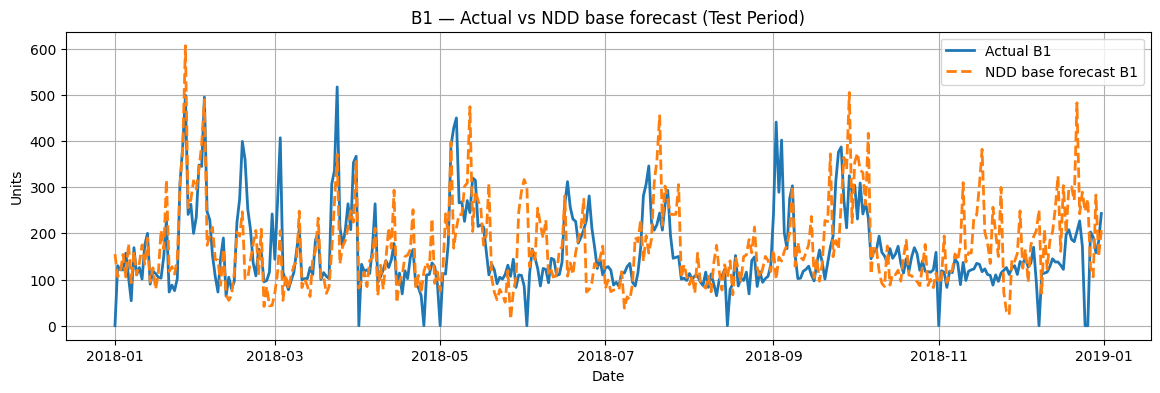

In [87]:
# ---- Call: plot B1 actual vs forecast in test window ----
_ = plot_brand_test_overlay(
    df=df,
    brand=BRAND,
    brand_pred=brand_pred_series,     # <-- pass the FORECAST series (not the actuals array)
    test_start=TEST_START,
    test_end=TEST_END,
    forecast_label="NDD base forecast"
)

In [88]:
# ---------------------------------------------------------------
# 6.2) Plotting helper — Actual vs Forecast for a specific ITEM
# ---------------------------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from typing import Union

def plot_item_test_overlay(
    df: pd.DataFrame,
    brand: str,
    item: Union[str, int],
    test_start: Union[str, pd.Timestamp],
    test_end: Union[str, pd.Timestamp],
    item_pred: Union[pd.Series, pd.DataFrame, np.ndarray],  # pd.Series OR pd.DataFrame (with the item col) OR array-like
    pred_index: Union[pd.Index, list, None] = None,      # required only if item_pred is array-like
    date_col_indexed: bool = True,
    y_label: str = "Units",
    actual_label: str = "Actual",
    forecast_label: str = "Forecast",
    title_suffix: str = "(Test Period)"
) -> tuple[pd.Series, pd.Series]:
    """
    Overlay Actual vs Forecast for a chosen item (brand+item) on ONE chart, restricted to [test_start, test_end].

    item_pred can be:
      • pd.Series with a DatetimeIndex
      • pd.DataFrame that contains the column f"QTY_{brand}_{item}"
      • array-like (then pass pred_index with matching timestamps)

    Returns (y_true_test, y_pred_on_true_index).
    """

    # Actual item series
    item_str = str(item)
    item_col = f"QTY_{brand}_{item_str}"
    if item_col not in df.columns:
        raise ValueError(f"Actuals column not found: {item_col}")

    y_item = pd.to_numeric(df[item_col], errors="coerce").fillna(0.0)

    # Restrict to test window
    test_start = pd.to_datetime(test_start)
    test_end   = pd.to_datetime(test_end)
    y_true_test = y_item.loc[test_start:test_end]
    if y_true_test.empty:
        raise ValueError("Actual item test window is empty; verify test_start/test_end against your data range.")

    # Forecast series coercion
    if isinstance(item_pred, pd.Series):
        if not isinstance(item_pred.index, pd.DatetimeIndex):
            raise ValueError("item_pred Series must have a DatetimeIndex.")
        y_pred_test = item_pred.sort_index().loc[test_start:test_end]

    elif isinstance(item_pred, pd.DataFrame):
        # Expect the item column inside the DataFrame (e.g., items_pred_df)
        if item_col not in item_pred.columns:
            raise ValueError(f"item_pred DataFrame does not contain column {item_col}.")
        pred_series = item_pred[item_col]
        if not isinstance(pred_series.index, pd.DatetimeIndex):
            raise ValueError("item_pred DataFrame must have a DatetimeIndex.")
        y_pred_test = pred_series.sort_index().loc[test_start:test_end]

    else:
        # array-like → need pred_index
        if pred_index is None:
            raise ValueError("item_pred is array-like; supply pred_index (timestamps).")
        arr = np.asarray(item_pred).reshape(-1)
        idx = pd.to_datetime(pd.Index(pred_index))
        if len(arr) != len(idx):
            raise ValueError(f"Length mismatch: item_pred={len(arr)} vs pred_index={len(idx)}.")
        pred_series = pd.Series(arr, index=idx, name=item_col).sort_index()
        y_pred_test = pred_series.loc[test_start:test_end]

    if y_pred_test.empty:
        raise ValueError("Forecast item test window is empty; check forecast dates vs test window.")

    # Align forecast to actual dates (handy for metrics)
    y_pred_on_true_index = y_pred_test.reindex(y_true_test.index)

    # Plot (single figure with both lines)
    plt.figure(figsize=(14, 4))
    plt.plot(y_true_test.index, y_true_test.values, label=f"{actual_label} {brand}-{item_str}", linewidth=2)
    plt.plot(y_pred_test.index, y_pred_test.values, label=f"{forecast_label} {brand}-{item_str}",
             linewidth=2, linestyle="--")
    plt.title(f"{brand}-{item_str} — {actual_label} vs {forecast_label} {title_suffix}".strip())
    plt.xlabel("Date")
    plt.ylabel(y_label)
    plt.grid(True)
    plt.legend()
    plt.show()

    return y_true_test, y_pred_on_true_index

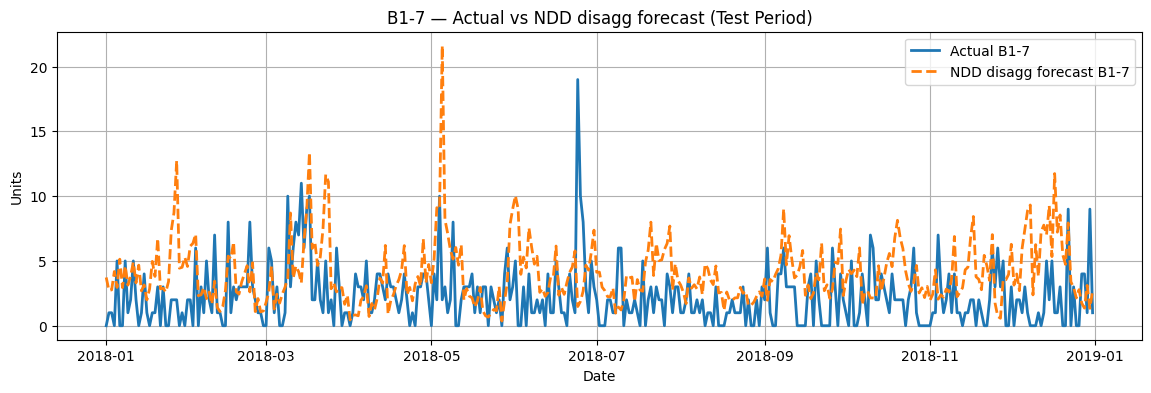

In [89]:
# Plot B1 item "7" during the test window using items_pred_df
_ = plot_item_test_overlay(
    df=df,
    brand="B1",
    item="7",
    test_start=TEST_START,
    test_end=TEST_END,
    item_pred=items_pred_df,               # DataFrame with columns like "QTY_B1_7"
    forecast_label="NDD disagg forecast"
)

# Hyperparameter Tuning: ML Model 2

We do hyperparameter tuning first on the B1 sales before going to other brand sales to simplify the process and make the notebook less cluttered

Selected Hyperparamters to tune are

1. Window Size = `10, 30, 60`
2. brand_laten_dim = `16, 4, 32`

## Window Size Tuning

In [90]:
WINDOW = 10

In [125]:
def run_training(brand_latent_dim = 16):
    # ---------------------------------------------------------------
    # 4) Prepare data for BRAND (F*) and train/predict
    # ---------------------------------------------------------------
    items_B1 = get_items_for_brand(BRAND)
    y_brand = get_brand_series(df, BRAND)
    X_brand  = build_brand_exog(df, BRAND)

    # Brand windows (scaled)
    yb_seq_sc, xb_seq_sc, yb_tgt_sc, idx_b, y_scaler, Xb_scaler = build_brand_sequences(
        y_brand, X_brand, window=WINDOW, hop=HOP, scaler_y=None, scaler_X=None
    )

    # Train/val/test masks by target index
    mask_train_b = (idx_b >= TRAIN_START) & (idx_b <= TRAIN_END)
    mask_test_b  = (idx_b >= TEST_START)  & (idx_b <= TEST_END)

    # Simple time-based split inside train for validation (last 10% of train windows)
    train_idx = np.where(mask_train_b)[0]
    cut = int(np.floor(0.9 * len(train_idx)))
    tr_sel, va_sel = train_idx[:cut], train_idx[cut:]

    brand_model = build_brand_cnn_mlp(WINDOW, X_brand.shape[1])
    _ = brand_model.fit(
        [yb_seq_sc[tr_sel], xb_seq_sc[tr_sel]], yb_tgt_sc[tr_sel],
        validation_data=([yb_seq_sc[va_sel], xb_seq_sc[va_sel]], yb_tgt_sc[va_sel]),
        epochs=20, batch_size=64, verbose=0,
        callbacks=[EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)]
    )

    # Predict scaled brand on test windows, then invert scaling to get to original units, unnormalized
    yb_pred_sc = brand_model.predict([yb_seq_sc[mask_test_b], xb_seq_sc[mask_test_b]], verbose=0).ravel()
    yb_pred    = y_scaler.inverse_transform(yb_pred_sc.reshape(-1,1)).ravel()
    idx_b_test = idx_b[mask_test_b]
    brand_pred_series = pd.Series(yb_pred, index=idx_b_test, name=f"{BRAND}_pred")


    # ---------------------------------------------------------------
    # 5) Prepare data for DISAGG (NND) and train/predict
    # ---------------------------------------------------------------
    Y_items = get_items_matrix(df, BRAND, items_B1)  # columns QTY_B1_i
    item_exog = build_item_exog(df, BRAND, items_B1) # PROMO_B1_i + calendar per item

    # Build disagg sequences (UNSCALED)
    yB_seq, Xitem_seq, yB_scalar, Yitem_t, idx_d = build_item_disagg_sequences(
        y_brand, Y_items, item_exog, window=WINDOW, hop=HOP
    )

    # Align train/test for disagg using target timestamps
    d_train = (idx_d >= TRAIN_START) & (idx_d <= TRAIN_END)
    d_test  = (idx_d >= TEST_START)  & (idx_d <= TEST_END)

    # Build inputs/targets
    X_disagg_train = [yB_seq[d_train], Xitem_seq[d_train], yB_scalar[d_train].reshape(-1,1)]
    Y_disagg_train = Yitem_t[d_train]
    X_disagg_test  = [yB_seq[d_test],  Xitem_seq[d_test],  None]  # yB_scalar for test will be brand forecast

    # For training, avoid windows where brand scalar is zero (optional)
    nonzero = Y_disagg_train.sum(axis=1) > 0
    X_disagg_train = [x[nonzero] for x in X_disagg_train]
    Y_disagg_train = Y_disagg_train[nonzero]

    # Build and train disaggregation model
    n_items = len(items_B1)
    n_item_exog = next(iter(item_exog.values())).shape[1]

    disagg_model = build_disagg_nnd(WINDOW, n_items=n_items, n_item_exog=n_item_exog, brand_latent_dim= brand_latent_dim)
    _ = disagg_model.fit(
        X_disagg_train, Y_disagg_train,
        validation_split=0.1,
        epochs=20, batch_size=64, verbose=0,
        callbacks=[EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)]
    )

    # Build brand scalars for test from brand forecast (ensures coherence)
    yB_scalar_test = brand_pred_series.reindex(idx_d[d_test]).values.reshape(-1,1)
    X_disagg_test[2] = yB_scalar_test

    # Predict per-item test forecasts (already coherent with brand)
    Y_items_pred = disagg_model.predict(X_disagg_test, verbose=0)  # shape (N_test, I)
    idx_items_test = idx_d[d_test]

    # Pack item forecasts into a DataFrame (columns aligned to items)
    items_cols = [f"QTY_{BRAND}_{it}" for it in items_B1]
    items_pred_df = pd.DataFrame(Y_items_pred, index=idx_items_test, columns=items_cols)


    # ---------------------------------------------------------------
    # 6) Results Evaluation
    # ---------------------------------------------------------------
    # Coherence check: sum of item preds vs brand pred
    sum_items_pred = items_pred_df.sum(axis=1)
    coh_max_abs_err = np.max(np.abs(sum_items_pred.values - brand_pred_series.reindex(sum_items_pred.index).values))
    print(f"Max abs coherence error (should be ~0): {coh_max_abs_err:.6f}")

    # Simple accuracy on items where ground truth exists
    Y_items_test = Y_items.reindex(idx_items_test)
    rmse_items = np.sqrt(mean_squared_error(Y_items_test.values.ravel(), items_pred_df.values.ravel()))
    mae_items  = mean_absolute_error(Y_items_test.values.ravel(), items_pred_df.values.ravel())
    #print(f"Items — RMSE: {rmse_items:.3f}, MAE: {mae_items:.3f}")

    # Brand accuracy on test
    y_brand_test = y_brand.reindex(idx_b_test).values
    rmse_brand = np.sqrt( mean_squared_error(y_brand_test, brand_pred_series.values))
    mae_brand  = mean_absolute_error(y_brand_test, brand_pred_series.values)
    #print(f"Brand {BRAND} — RMSE: {rmse_brand:.3f}, MAE: {mae_brand:.3f}")

    return brand_pred_series, y_brand_test, Y_items_test, rmse_brand, mae_brand,  rmse_items, mae_items 

In [106]:
WINDOW = 10
brand_pred_series, y_brand_test, Y_items_test, rmse_brand, mae_brand,  rmse_items, mae_items = run_training()

print(f"Items — RMSE: {rmse_items:.3f}, MAE: {mae_items:.3f}")
print(f"Brand {BRAND} — RMSE: {rmse_brand:.3f}, MAE: {mae_brand:.3f}")

Max abs coherence error (should be ~0): 0.000061
Items — RMSE: 7.137, MAE: 3.693
Brand B1 — RMSE: 85.252, MAE: 61.746


In [103]:
WINDOW = 30
brand_pred_series, y_brand_test, Y_items_test, rmse_brand, mae_brand,  rmse_items, mae_items = run_training()

print(f"Items — RMSE: {rmse_items:.3f}, MAE: {mae_items:.3f}")
print(f"Brand {BRAND} — RMSE: {rmse_brand:.3f}, MAE: {mae_brand:.3f}")

Max abs coherence error (should be ~0): 0.000092
Items — RMSE: 7.242, MAE: 3.733
Brand B1 — RMSE: 88.382, MAE: 61.856


In [102]:
WINDOW = 60
brand_pred_series, y_brand_test, Y_items_test, rmse_brand, mae_brand,  rmse_items, mae_items = run_training()

print(f"Items — RMSE: {rmse_items:.3f}, MAE: {mae_items:.3f}")
print(f"Brand {BRAND} — RMSE: {rmse_brand:.3f}, MAE: {mae_brand:.3f}")

Max abs coherence error (should be ~0): 0.000061
Items — RMSE: 7.182, MAE: 3.594
Brand B1 — RMSE: 93.346, MAE: 68.185


We Got the following for Window.

|Window|RMSE|MAE|
|---|---|---|
|10|85.252| 61.746|
|30|88.382|61.856|
|60|93.346|68.156|

Clearly WINDOW = 10 is the best performer. We use this for following hyperparamter tuning

In [107]:
WINDOW = 10

## Brand Latent Dimension

brand_laten_dim = 16, 4, 64

In [108]:
brand_latent_dim = 4
brand_pred_series, y_brand_test, Y_items_test, rmse_brand, mae_brand,  rmse_items, mae_items = run_training(brand_latent_dim=brand_latent_dim)

print(f"Items — RMSE: {rmse_items:.3f}, MAE: {mae_items:.3f}")
print(f"Brand {BRAND} — RMSE: {rmse_brand:.3f}, MAE: {mae_brand:.3f}")

Max abs coherence error (should be ~0): 0.000122
Items — RMSE: 7.133, MAE: 3.695
Brand B1 — RMSE: 80.424, MAE: 58.878


In [109]:
brand_latent_dim = 16
brand_pred_series, y_brand_test, Y_items_test, rmse_brand, mae_brand,  rmse_items, mae_items = run_training(brand_latent_dim=brand_latent_dim)

print(f"Items — RMSE: {rmse_items:.3f}, MAE: {mae_items:.3f}")
print(f"Brand {BRAND} — RMSE: {rmse_brand:.3f}, MAE: {mae_brand:.3f}")

Max abs coherence error (should be ~0): 0.000092
Items — RMSE: 7.116, MAE: 3.538
Brand B1 — RMSE: 80.492, MAE: 57.258


In [110]:
brand_latent_dim = 64
brand_pred_series, y_brand_test, Y_items_test, rmse_brand, mae_brand,  rmse_items, mae_items = run_training(brand_latent_dim=brand_latent_dim)

print(f"Items — RMSE: {rmse_items:.3f}, MAE: {mae_items:.3f}")
print(f"Brand {BRAND} — RMSE: {rmse_brand:.3f}, MAE: {mae_brand:.3f}")

Max abs coherence error (should be ~0): 0.000061
Items — RMSE: 7.182, MAE: 3.647
Brand B1 — RMSE: 87.027, MAE: 61.548


Results Indicate

|Brand Latent Dimension|RMSE|MAE|
|---|---|---|
|4|80.424| 58.878|
|16|80.492|57.258|
|64|87.027|61.548|

for Brand latent dimension = 16 there is lower MAE, but slightly higher RMSE than Brand Latent Dimension = 4
WE will choose Brand latent dimension = 4

Best Hyperparameter Results for ML Model 2

WINDOW = 10

Brand Latent Dimension = 16

In [111]:
WINDOW =10
brand_latent_dim = 16

# Plotting Function

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import Union, Optional

def plot_brand_test_overlay(
    df: pd.DataFrame,
    brand: str,
    test_start: Union[str, pd.Timestamp],
    test_end: Union[str, pd.Timestamp],
    *,
    # FORECAST (required for overlay)
    brand_pred: Optional[Union[pd.Series, np.ndarray, list]] = None,
    pred_index: Optional[Union[pd.Index, list]] = None,
    # ACTUALS (optional override — e.g., pass your y_brand_test here)
    actual: Optional[Union[pd.Series, np.ndarray, list]] = None,
    actual_index: Optional[Union[pd.Index, list]] = None,
    date_col_indexed: bool = True,
    y_label: str = "Units",
    actual_label: str = "Actual",
    forecast_label: str = "Forecast",
    title_suffix: str = "(Test Period)"
) -> tuple[pd.Series, Optional[pd.Series]]:
    """
    Overlay Actual vs Forecast for a brand on ONE chart, restricted to [test_start, test_end].

    - `brand_pred`: pd.Series with DatetimeIndex OR array-like with `pred_index`.
    - `actual`: optional override for actuals (pd.Series or array-like with `actual_index`).
      If not provided, actuals are built from df for the given brand.

    Returns
    -------
    y_true_test : pd.Series
        Actual brand series in [test_start, test_end].
    y_pred_on_true_index : pd.Series | None
        Forecast reindexed to actual test dates (None if brand_pred=None).
    """
    # Ensure datetime index if needed
    if not date_col_indexed:
        if "DATE" not in df.columns:
            raise ValueError("DATE column not found; set date_col_indexed=True or include a DATE column.")
        df = df.copy()
        df["DATE"] = pd.to_datetime(df["DATE"])
        df = df.set_index("DATE").sort_index()

    if not isinstance(df.index, pd.DatetimeIndex):
        raise ValueError("df must be indexed by DatetimeIndex or pass date_col_indexed=False to convert.")

    test_start = pd.to_datetime(test_start)
    test_end   = pd.to_datetime(test_end)

    # ---- ACTUALS (build from df unless override is provided) ----
    if actual is None:
        brand_sum_col = f"Brand_QTY_{brand}"
        if brand_sum_col in df.columns:
            y_brand_this = pd.to_numeric(df[brand_sum_col], errors="coerce").fillna(0.0)
        else:
            qty_cols = [c for c in df.columns if c.startswith(f"QTY_{brand}_")]
            if not qty_cols:
                raise ValueError(f"No columns found for brand {brand} (looked for {brand_sum_col} or QTY_{brand}_*).")
            y_brand_this = df[qty_cols].apply(pd.to_numeric, errors="coerce").fillna(0.0).sum(axis=1)
        y_true_test = y_brand_this.loc[test_start:test_end]
    else:
        # Coerce override to Series with Date index
        if isinstance(actual, pd.Series):
            y_true_test = actual.sort_index().loc[test_start:test_end]
        else:
            if actual_index is None:
                raise ValueError("`actual` is array-like; please supply `actual_index` (timestamps).")
            arr = np.asarray(actual).reshape(-1)
            idx = pd.to_datetime(pd.Index(actual_index))
            if len(arr) != len(idx):
                raise ValueError(f"Length mismatch: actual={len(arr)} vs actual_index={len(idx)}.")
            y_true_test = pd.Series(arr, index=idx, name=f"{brand}_actual").sort_index().loc[test_start:test_end]

    if y_true_test.empty:
        raise ValueError("Actual test window is empty; verify test_start/test_end and indices.")

    # ---- FORECAST (optional; if None, we’ll plot only actual) ----
    y_pred_test = None
    if brand_pred is not None:
        if isinstance(brand_pred, pd.Series):
            if not isinstance(brand_pred.index, pd.DatetimeIndex):
                raise ValueError("brand_pred Series must have a DatetimeIndex.")
            y_pred_test = brand_pred.sort_index().loc[test_start:test_end]
        else:
            if pred_index is None:
                raise ValueError("brand_pred is array-like; supply `pred_index` (timestamps).")
            arr = np.asarray(brand_pred).reshape(-1)
            idx = pd.to_datetime(pd.Index(pred_index))
            if len(arr) != len(idx):
                raise ValueError(f"Length mismatch: brand_pred={len(arr)} vs pred_index={len(idx)}.")
            y_pred_test = pd.Series(arr, index=idx, name=f"{brand}_forecast").sort_index().loc[test_start:test_end]
        if y_pred_test.empty:
            raise ValueError("Forecast test window is empty; check forecast dates vs test window.")
        y_pred_on_true_index = y_pred_test.reindex(y_true_test.index)
    else:
        y_pred_on_true_index = None

    # ---- Plot (single figure) ----
    plt.figure(figsize=(14, 4))
    plt.plot(y_true_test.index, y_true_test.values, label=f"{actual_label} {brand}", linewidth=2)
    if y_pred_test is not None:
        plt.plot(y_pred_test.index, y_pred_test.values, label=f"{forecast_label} {brand}", linewidth=2, linestyle="--")
        title_mid = f"{actual_label} vs {forecast_label}"
    else:
        title_mid = f"{actual_label} only"
    plt.title(f"{brand} — {title_mid} {title_suffix}".strip())
    plt.xlabel("Date")
    plt.ylabel(y_label)
    plt.grid(True)
    plt.legend()
    plt.show()

    return y_true_test, y_pred_on_true_index

# ML Model 2 on All Brands

ML Model 2 will now be trained on all the remaining brands

## Brand B2

In [127]:
BRAND = "B2"

In [128]:
brand_pred_series, y_brand_test, Y_items_test, rmse_brand, mae_brand,  rmse_items, mae_items = run_training(brand_latent_dim=brand_latent_dim)

print(f"Items — RMSE: {rmse_items:.3f}, MAE: {mae_items:.3f}")
print(f"Brand {BRAND} — RMSE: {rmse_brand:.3f}, MAE: {mae_brand:.3f}")

Max abs coherence error (should be ~0): 0.000061
Items — RMSE: 4.299, MAE: 2.668
Brand B2 — RMSE: 59.897, MAE: 45.353


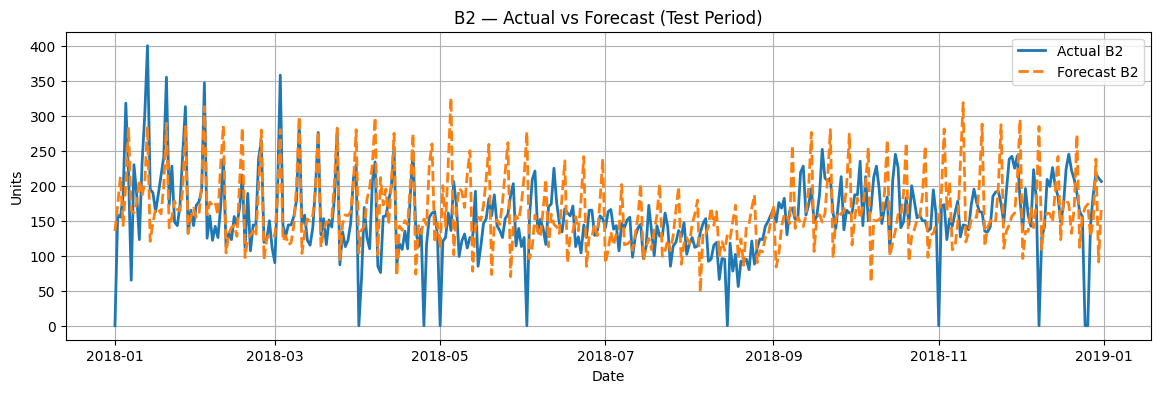

In [129]:
# If you also have forecast series in scope (e.g., brand_pred_series) and test dates (idx_b_test):
_ = plot_brand_test_overlay(
    df, BRAND,
    test_start=TEST_START, test_end=TEST_END,
    brand_pred=brand_pred_series,           # forecast (Series with DatetimeIndex)
    actual=y_brand_test,                    # <-- pass your NumPy actuals
    actual_index=idx_b_test                 # <-- the timestamps that align with y_brand_test
)

## Brand B3

In [132]:
BRAND = "B3"

In [133]:
brand_pred_series, y_brand_test, Y_items_test, rmse_brand, mae_brand,  rmse_items, mae_items = run_training(brand_latent_dim=brand_latent_dim)

print(f"Items — RMSE: {rmse_items:.3f}, MAE: {mae_items:.3f}")
print(f"Brand {BRAND} — RMSE: {rmse_brand:.3f}, MAE: {mae_brand:.3f}")

Max abs coherence error (should be ~0): 0.000031
Items — RMSE: 3.869, MAE: 1.931
Brand B3 — RMSE: 39.154, MAE: 24.797


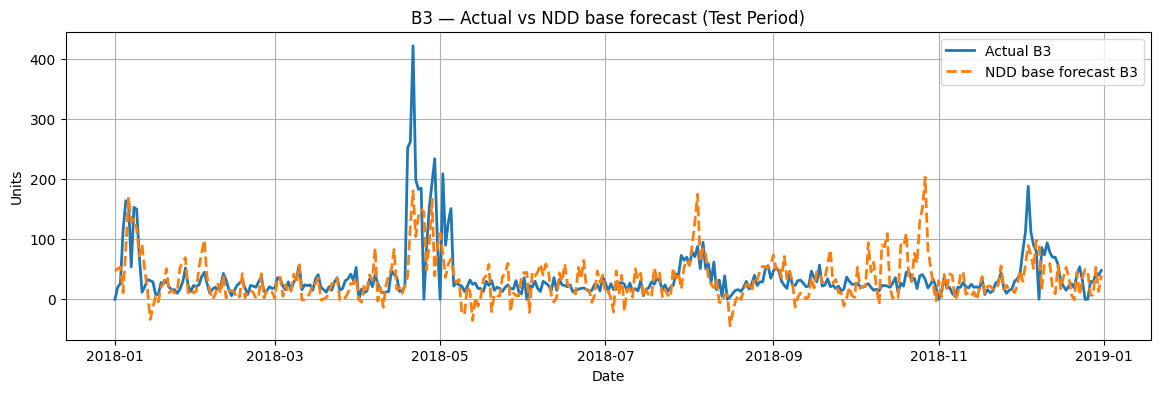

In [134]:
# ---- Call: plot Brand actual vs forecast in test window ----
_ = plot_brand_test_overlay(
    df=df,
    brand=BRAND,
    brand_pred=brand_pred_series,     # <-- pass the FORECAST series (not the actuals array)
    test_start=TEST_START,
    test_end=TEST_END,
    forecast_label="NDD base forecast"
)

## Brand B4

In [135]:
BRAND = "B4"

In [137]:
brand_pred_series, y_brand_test, Y_items_test, rmse_brand, mae_brand,  rmse_items, mae_items = run_training(brand_latent_dim=brand_latent_dim)

print(f"Items — RMSE: {rmse_items:.3f}, MAE: {mae_items:.3f}")
print(f"Brand {BRAND} — RMSE: {rmse_brand:.3f}, MAE: {mae_brand:.3f}")

Max abs coherence error (should be ~0): 0.000031
Items — RMSE: 12.123, MAE: 4.947
Brand B4 — RMSE: 69.244, MAE: 34.209


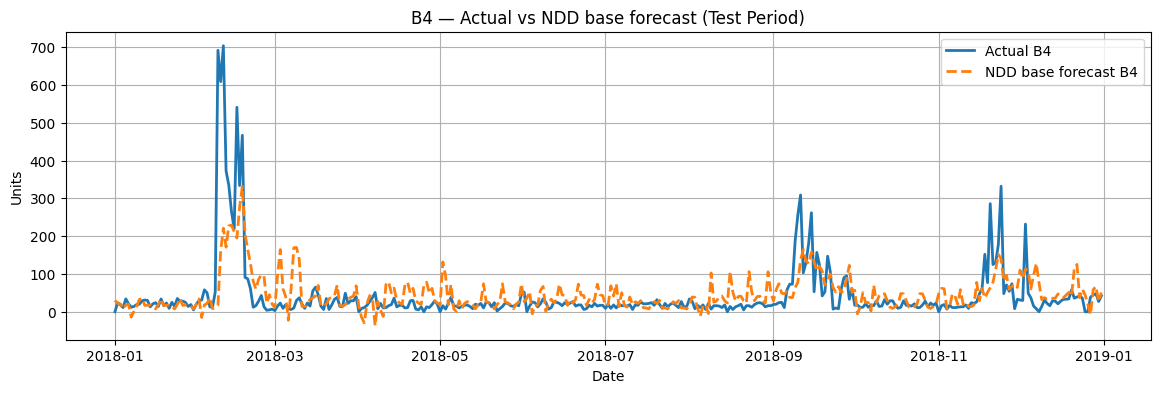

In [138]:
# ---- Call: plot Brand actual vs forecast in test window ----
_ = plot_brand_test_overlay(
    df=df,
    brand=BRAND,
    brand_pred=brand_pred_series,     # <-- pass the FORECAST series (not the actuals array)
    test_start=TEST_START,
    test_end=TEST_END,
    forecast_label="NDD base forecast"
)